In [6]:
from arcpy import *
from arcpy import env
from arcpy.sa import *
import pandas as pd
import numpy as np
import os, datetime
from osgeo import ogr
import rasterio
import xarray as xr
from rasterio.transform import from_origin
import subprocess, time
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib as mpl

In [7]:
path_excel_ground = r"D:\Code_Result\Result\NASA\Ground_Data\Observed_Data_July.xlsx"
data_excel_file = pd.ExcelFile(path_excel_ground)
print(data_excel_file.sheet_names)

['Pendleton - McKay Cr', 'Portland - SE Lafaye', 'Portland - Sauvie Is', 'Portland - Spangler', 'Portland Near Road', 'John Day Dayton St', 'Estacada Clackamas R', 'Grants Pass - Parksi', 'Klamath Falls - Pete', 'Albany - Calapooia S', 'Lakeview - Center &', 'Baker City - Forest', 'Beaverton - Highland', 'Turner - CJHS', 'Hillsboro - Hare Fie', 'Hermiston - Municipa', 'The Dalles - Cherry', 'Madras - Westside Sc', 'Talent - Rapp Lane', 'Sweet Home - Fire De', 'Cave Junction Forest', 'Sisters Forest Servi', 'Silverton', 'Shady Cove - Shady C', 'Cottage Grove City S', 'Salem - State Hospit', 'Eugene - Highway 99', 'Eugene - Amazon Park', 'Oakridge - Willamett', 'Roosevelt High Schoo', 'Portland Lane Middle', 'Portland Lincoln Hig', 'Portland SE 12th and', 'Portland McDaniel Hi', 'Enterprise - US Fore', 'Ashland Fire Dept', 'Sunriver Three River', 'Bend Pine Ridge Elem', 'Bend Ponderosa Eleme', 'Bend - Pump Station', 'Salem Chemeketa Comm', 'Toledo NE Hwy20 & NW', 'Woodburn Chemeketa C', 

In [8]:
data_1 = {}; data_2 = {}; data_in_general = {}

In [9]:
stations = data_excel_file.sheet_names
for station in stations:
    data_excel = pd.read_excel(path_excel_ground, sheet_name=station)
    data_excel = data_excel[data_excel["PM2.5"].notna()]; data_excel.reset_index(inplace=True)
    data_2[station] = data_excel
for station in stations:
    data_1[station] = pd.DataFrame()

In [10]:
excel_path = "D:/Code_Result/Result/NASA/Value_Data_30minutes/"
excel_files = os.listdir(excel_path)

dict_data = {}
variables = ["PM25_RH35_GCC"]
for variable in variables:
    for index in range(len(stations)):
        dict_data[variable + "_" + stations[index]] = []

for excel in excel_files:
    if (excel.endswith(".xlsx")):
        parts = excel.split('_')
        year = int(parts[0]); month = int(parts[1])
        day = int(parts[2]); hour = int(parts[3])
        variable = excel[14:-5]
        print(year, month, day, hour, variable)
        excel_file_path = excel_path + excel
        data = pd.read_excel(excel_file_path)
        for index in range(len(stations)):
            dict_data[variable + "_" + stations[index]].append(data['RASTERVALU'][index])

2023 7 1 0 PM25_RH35_GCC
2023 7 1 1 PM25_RH35_GCC
2023 7 1 2 PM25_RH35_GCC
2023 7 1 3 PM25_RH35_GCC
2023 7 1 4 PM25_RH35_GCC
2023 7 1 5 PM25_RH35_GCC
2023 7 1 6 PM25_RH35_GCC
2023 7 1 7 PM25_RH35_GCC
2023 7 1 8 PM25_RH35_GCC
2023 7 1 9 PM25_RH35_GCC
2023 7 1 10 PM25_RH35_GCC
2023 7 1 11 PM25_RH35_GCC
2023 7 1 12 PM25_RH35_GCC
2023 7 1 13 PM25_RH35_GCC
2023 7 1 14 PM25_RH35_GCC
2023 7 1 15 PM25_RH35_GCC
2023 7 1 16 PM25_RH35_GCC
2023 7 1 17 PM25_RH35_GCC
2023 7 1 18 PM25_RH35_GCC
2023 7 1 19 PM25_RH35_GCC
2023 7 1 20 PM25_RH35_GCC
2023 7 1 21 PM25_RH35_GCC
2023 7 1 22 PM25_RH35_GCC
2023 7 1 23 PM25_RH35_GCC
2023 7 2 0 PM25_RH35_GCC
2023 7 2 1 PM25_RH35_GCC
2023 7 2 2 PM25_RH35_GCC
2023 7 2 3 PM25_RH35_GCC
2023 7 2 4 PM25_RH35_GCC
2023 7 2 5 PM25_RH35_GCC
2023 7 2 6 PM25_RH35_GCC
2023 7 2 7 PM25_RH35_GCC
2023 7 2 8 PM25_RH35_GCC
2023 7 2 9 PM25_RH35_GCC
2023 7 2 10 PM25_RH35_GCC
2023 7 2 11 PM25_RH35_GCC
2023 7 2 12 PM25_RH35_GCC
2023 7 2 13 PM25_RH35_GCC
2023 7 2 14 PM25_RH35_GCC
2023 7

In [11]:
year = 2023; month = 7; day = 31; hour = 24
for index in range(len(stations)):
    day_station = []; hour_station = []
    year_station = []; month_station = []
    for day_index in range(1, day+1, 1):
        for hour_index in range(hour):
            day_station.append(day_index)
            hour_station.append(hour_index)
            year_station.append(year)
            month_station.append(month)
    for hour_index in range(7):
        day_station.append(1)
        hour_station.append(hour_index)
        year_station.append(year)
        month_station.append(8)

    data_1[stations[index]]['Year'] = year_station
    data_1[stations[index]]['Month'] = month_station
    data_1[stations[index]]['Day'] = day_station
    data_1[stations[index]]['Hour'] = hour_station

    for variable in variables:
        data_1[stations[index]][variable] = dict_data[variable + "_" + stations[index]]

In [12]:
for index_tram in range(len(stations)):
    for index in range(data_1[stations[index_tram]]['Year'].size):
        int(data_1[stations[index_tram]]['Year'][index])
        int(data_1[stations[index_tram]]['Month'][index])
        int(data_1[stations[index_tram]]['Day'][index])
        int(data_1[stations[index_tram]]['Hour'][index])
    for index in range(data_2[stations[index_tram]]['Year'].size):
        int(data_2[stations[index_tram]]['Year'][index])
        int(data_2[stations[index_tram]]['Month'][index])
        int(data_2[stations[index_tram]]['Day'][index])
        int(data_2[stations[index_tram]]['Hour'][index])

In [13]:
def Check(year, month, day, hour, index_2, station):
    if (year != data_2[station]['Year'][index_2]
     or month != data_2[station]['Month'][index_2]
     or day != data_2[station]['Day'][index_2]
     or hour != data_2[station]['Hour'][index_2]):
        return False
    return True

In [14]:
day_month = [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]; UTC = -7
def date_time(index_1, indextram):
    year = data_1[stations[indextram]]['Year'][index_1]
    month = data_1[stations[indextram]]['Month'][index_1]
    day = data_1[stations[indextram]]['Day'][index_1]
    hour = data_1[stations[indextram]]['Hour'][index_1] + UTC ### UTC -7
    if (UTC < 0):
        if (hour < 0):
            hour = hour + 24; day = day - 1
            if (day == 0):
                month = month-1; day = day_month[month]
    else:
        if (hour > 0):
            hour = hour - 24; day = day+1
            if (day == day_month[month]):
                month = month+1; day = 1
    return year, month, day, hour

In [15]:
data_calibration = pd.DataFrame(columns=["Year", "Month", "Day", "Hour", "Station",
                                            "PM25_High", "PM25_Low",])
index_data_calibration = 0

for index_tram in range(len(stations)):
    print(stations[index_tram])
    data_in_general[stations[index_tram]] = pd.DataFrame(columns=["Year", "Month", "Day", "Hour",
                                                                    "PM25_High", "PM25_Low",])
    index_1 = 0; year, month, day, hour = date_time(index_1, index_tram)
    for index_2 in range(data_2[stations[index_tram]]["PM2.5"].size):
        while(Check(year, month, day, hour, index_2, stations[index_tram]) == False):
            index_1 = index_1 + 1
            year, month, day, hour = date_time(index_1, index_tram)
        data_calibration.loc[index_data_calibration] = {
            "Year": year, "Month": month, "Day": day, "Hour": hour, "Station": stations[index_tram],
            "PM25_High": data_1[stations[index_tram]].at[index_1, "PM25_RH35_GCC"],
            "PM25_Low": data_2[stations[index_tram]].at[index_2, "PM2.5"]
        }
        index_data_calibration += 1
        data_in_general[stations[index_tram]].loc[index_2] = [year, month, day, hour,
                                                         data_1[stations[index_tram]].at[index_1, "PM25_RH35_GCC"],
                                                         data_2[stations[index_tram]].at[index_2, "PM2.5"]]

Pendleton - McKay Cr
Portland - SE Lafaye
Portland - Sauvie Is
Portland - Spangler
Portland Near Road
John Day Dayton St
Estacada Clackamas R
Grants Pass - Parksi
Klamath Falls - Pete
Albany - Calapooia S
Lakeview - Center &
Baker City - Forest
Beaverton - Highland
Turner - CJHS
Hillsboro - Hare Fie
Hermiston - Municipa
The Dalles - Cherry
Madras - Westside Sc
Talent - Rapp Lane
Sweet Home - Fire De
Cave Junction Forest
Sisters Forest Servi
Silverton
Shady Cove - Shady C
Cottage Grove City S
Salem - State Hospit
Eugene - Highway 99
Eugene - Amazon Park
Oakridge - Willamett
Roosevelt High Schoo
Portland Lane Middle
Portland Lincoln Hig
Portland SE 12th and
Portland McDaniel Hi
Enterprise - US Fore
Ashland Fire Dept
Sunriver Three River
Bend Pine Ridge Elem
Bend Ponderosa Eleme
Bend - Pump Station
Salem Chemeketa Comm
Toledo NE Hwy20 & NW
Woodburn Chemeketa C
Corvallis EPA Office
Tillamook Jr High Sc
McMinnville High Sch
Springfield City Hal
Portland Humboldt Sc
Detroit Lake
Crater Lake 

In [16]:
data_calibration

Year Month Day Hour               Station  PM25_High  PM25_Low
0      2023     7   1    0  Pendleton - McKay Cr    4.63825       3.5
1      2023     7   1    1  Pendleton - McKay Cr    4.98943       3.3
2      2023     7   1    2  Pendleton - McKay Cr    5.44698       3.1
3      2023     7   1    3  Pendleton - McKay Cr    5.85321       3.2
4      2023     7   1    4  Pendleton - McKay Cr    6.18823       3.4
...     ...   ...  ..  ...                   ...        ...       ...
48672  2023     7  31   19  Prineville - Davidso    8.57187       9.0
48673  2023     7  31   20  Prineville - Davidso    7.93366       7.0
48674  2023     7  31   21  Prineville - Davidso    6.89456       5.7
48675  2023     7  31   22  Prineville - Davidso    6.06516       5.1
48676  2023     7  31   23  Prineville - Davidso    5.79077       5.0

[48677 rows x 7 columns]

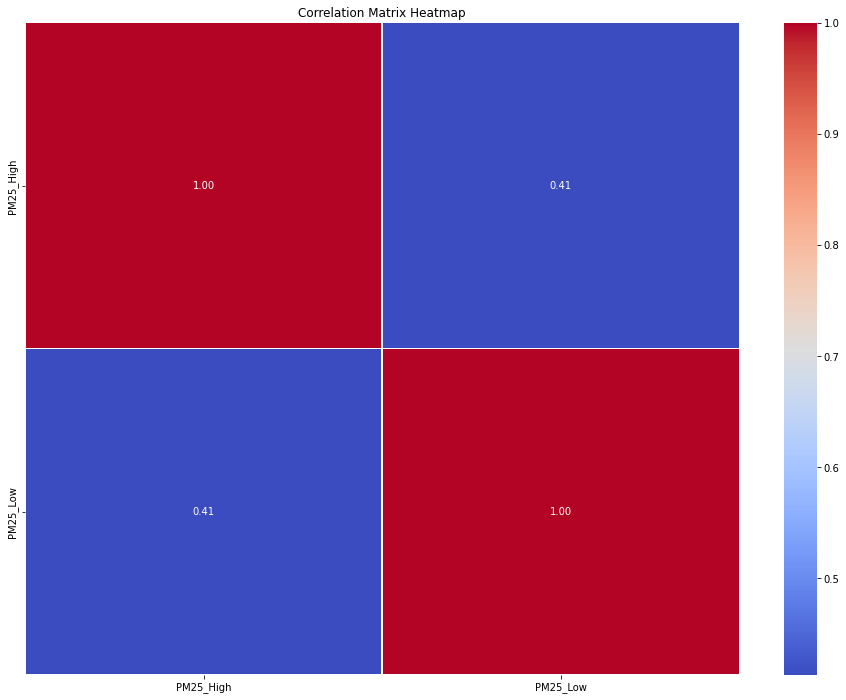

In [17]:
# Select the relevant columns
columns = [
    'PM25_High', 'PM25_Low'
]
data_calibration = data_calibration[columns]

# Compute the correlation matrix
correlation_matrix = data_calibration.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
correlation_matrix

PM25_High  PM25_Low
PM25_High   1.000000  0.412994
PM25_Low    0.412994  1.000000

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [20]:
df_error = pd.DataFrame(columns = ["R_Squared", "MAE", "RMSE"])

R²: 0.318757020078425
MAE: 3.752423582490069
RMSE: 10.51702435789572


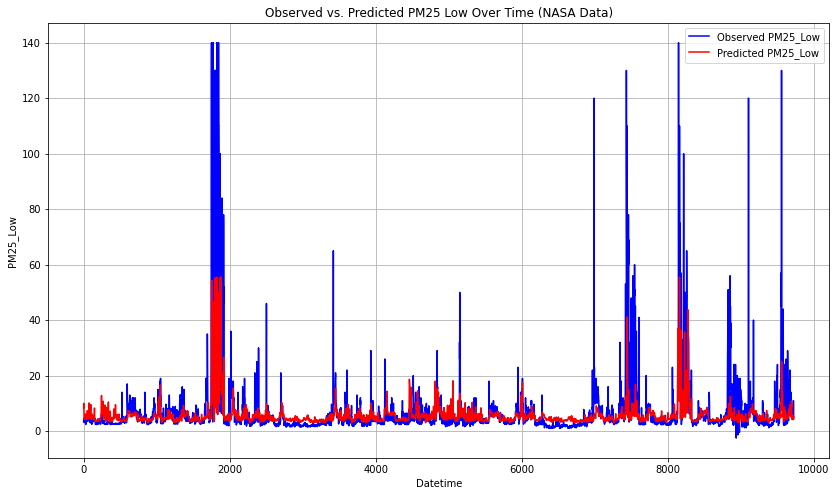

In [21]:
df = data_calibration.copy()

# Define input and output variables
X = df[['PM25_High']][df['PM25_Low']<150]
y = df['PM25_Low'][df['PM25_Low']<150]
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

filename = r'D:\Code_Result\Result\NASA\Result_30minutes\Method_1\3_Model_30minutes_July_After_Corrected.sav'
pickle.dump(model, open(filename, 'wb'))

# Make predictions
y_pred = model.predict(X_test_poly)

# Calculate errors
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_error.loc["All_Data"] = [r2, mae, rmse]

print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Plot observed vs. predicted values
fig =plt.figure(figsize=(14, 8))

# Plotting the actual and predicted values
plt.plot(y_test.values, label='Observed PM25_Low', color='blue')
plt.plot(y_pred, label='Predicted PM25_Low', color='red')

plt.xlabel('Datetime')
plt.ylabel('PM25_Low')
plt.title('Observed vs. Predicted PM25 Low Over Time (NASA Data)')
plt.legend(); plt.grid(True); plt.show()
fig.savefig(r"D:\Code_Result\Result\NASA\Result_30minutes\Method_1\0_Verification_All.jpg", format="jpg", dpi=1000)

R2_Verification_Pendleton - McKay Cr:  0.09027117024787645


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


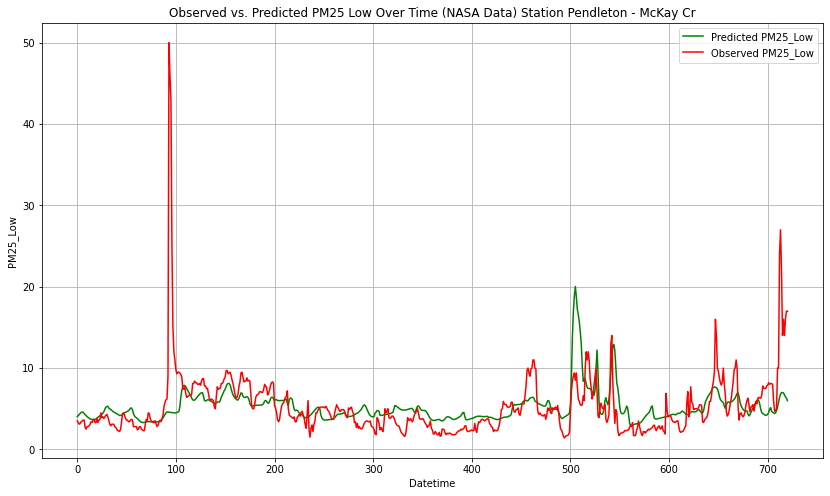

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Portland - SE Lafaye:  0.10767086225340006


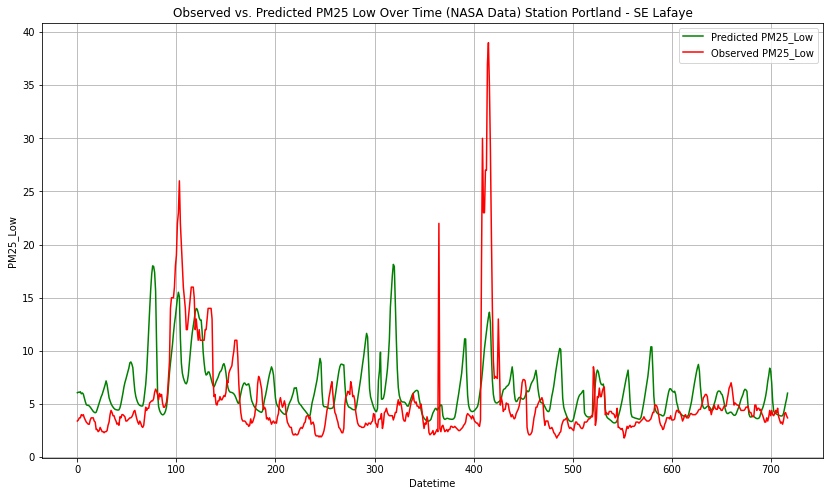

R2_Verification_Portland - Sauvie Is:  0.38177531884128535


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


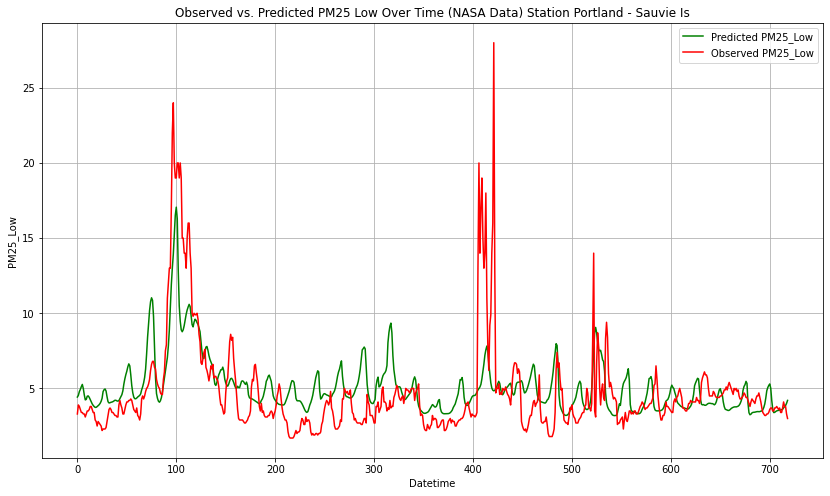

R2_Verification_Portland - Spangler:  0.2217901533461717


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


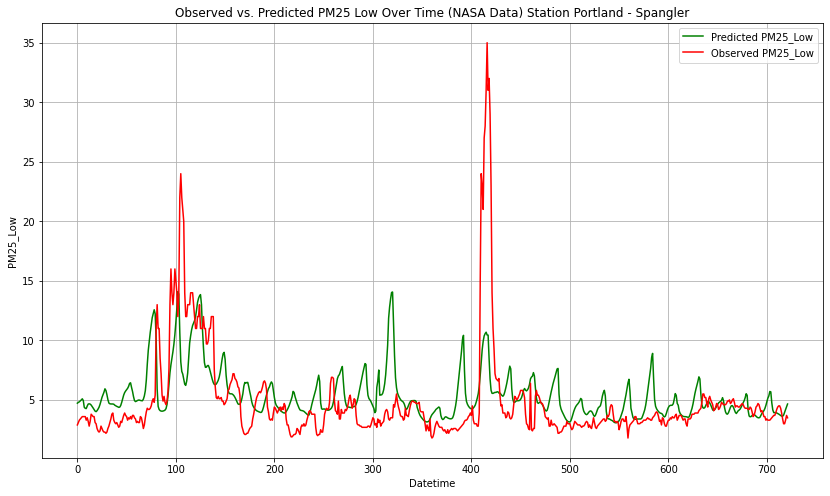

R2_Verification_Portland Near Road:  0.455580747029003


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


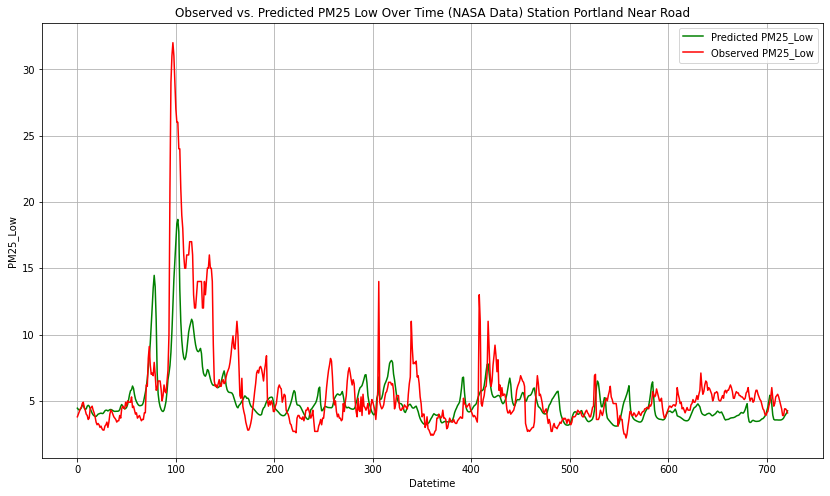

R2_Verification_John Day Dayton St:  0.14834326643506368


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


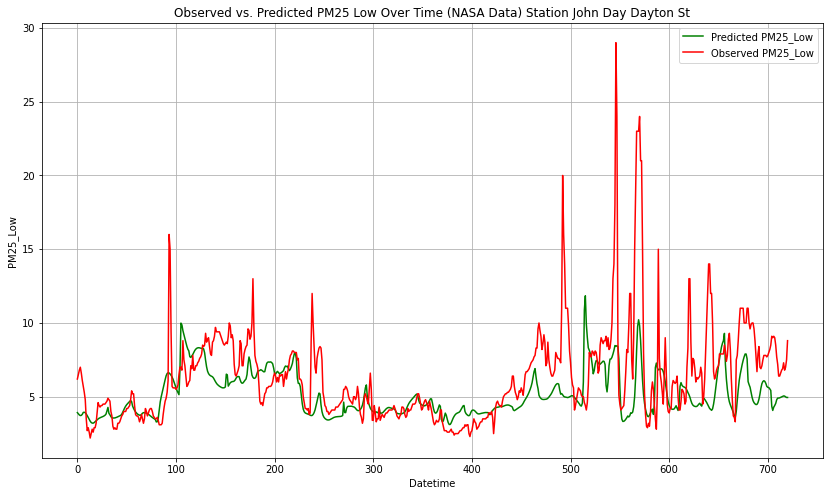

R2_Verification_Estacada Clackamas R:  0.010332983602103107


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


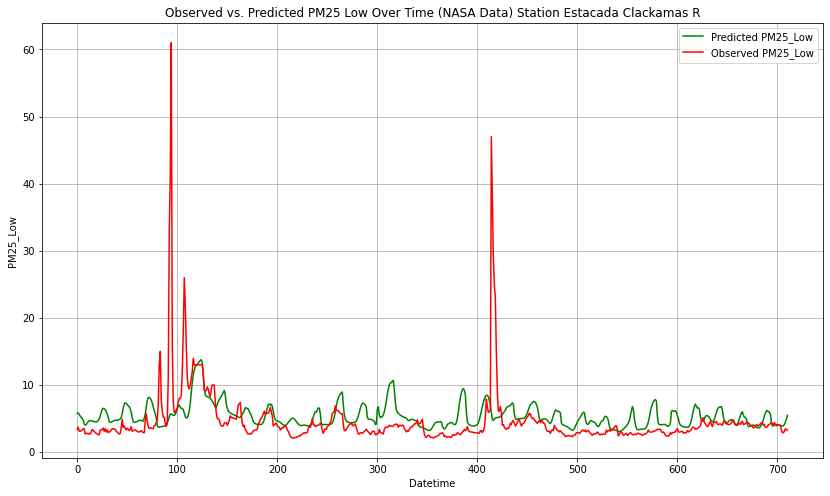

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Grants Pass - Parksi:  -0.025270944665841455


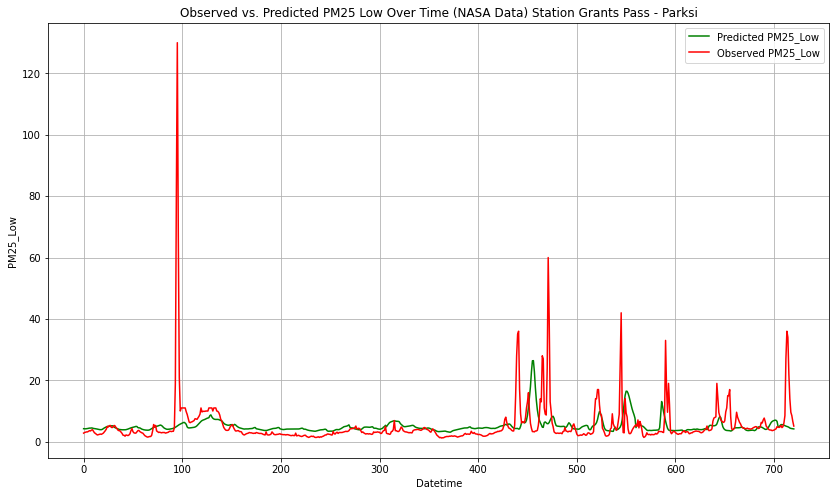

R2_Verification_Klamath Falls - Pete:  -0.04007322247741385


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


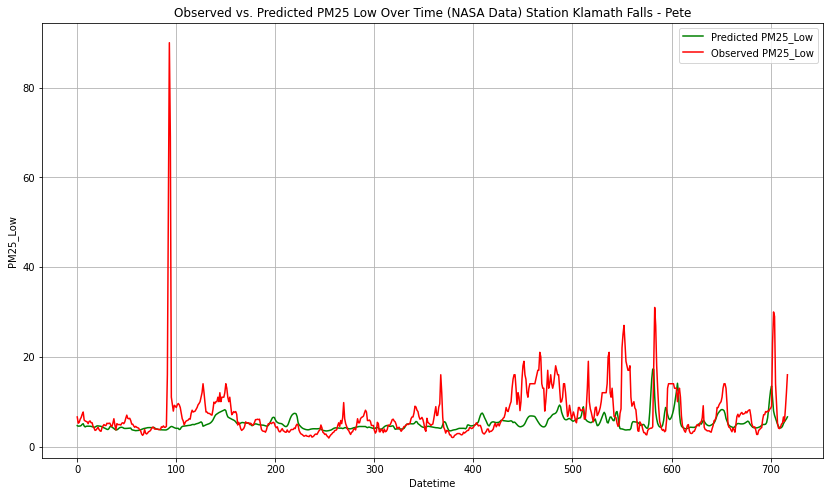

R2_Verification_Albany - Calapooia S:  0.07697963843136912


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


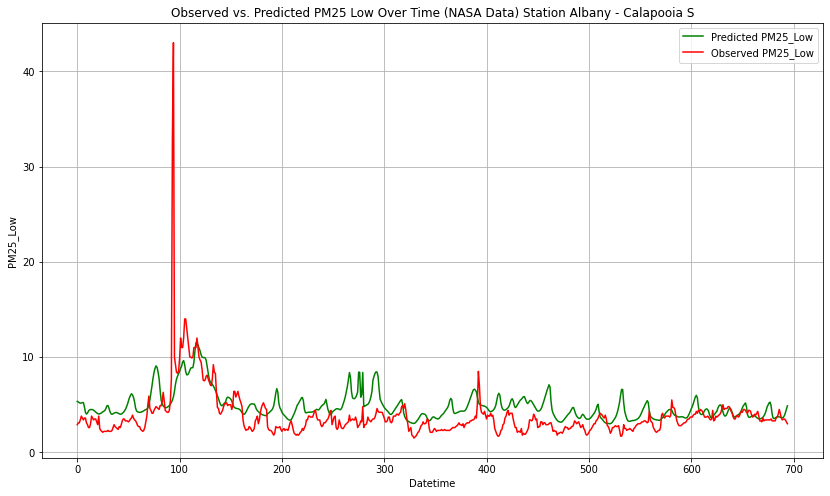

R2_Verification_Lakeview - Center &:  -0.05304292625252227


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


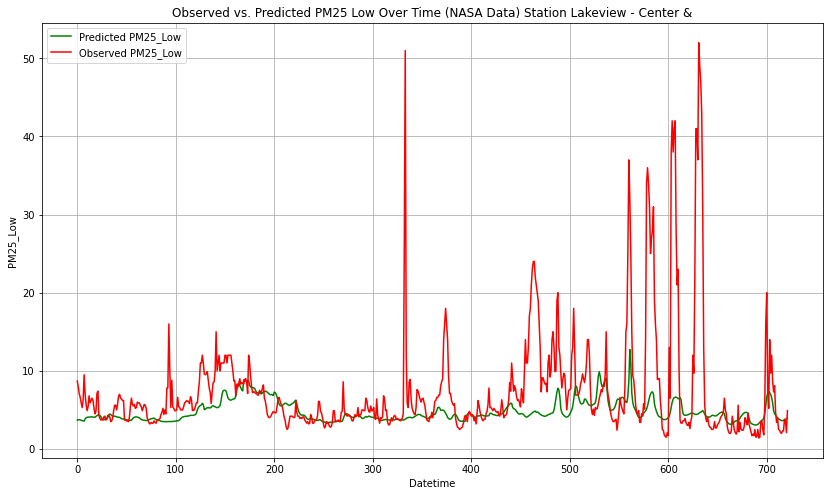

R2_Verification_Baker City - Forest:  0.1237077167354862


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


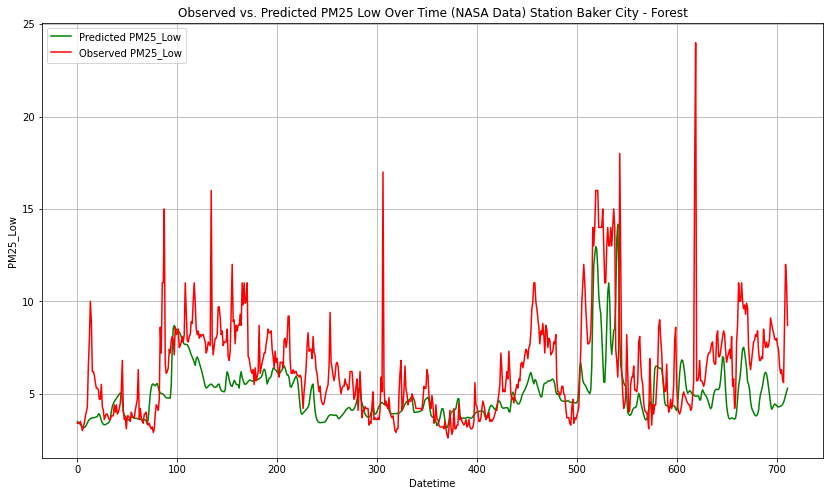

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Beaverton - Highland:  0.1075043702388131


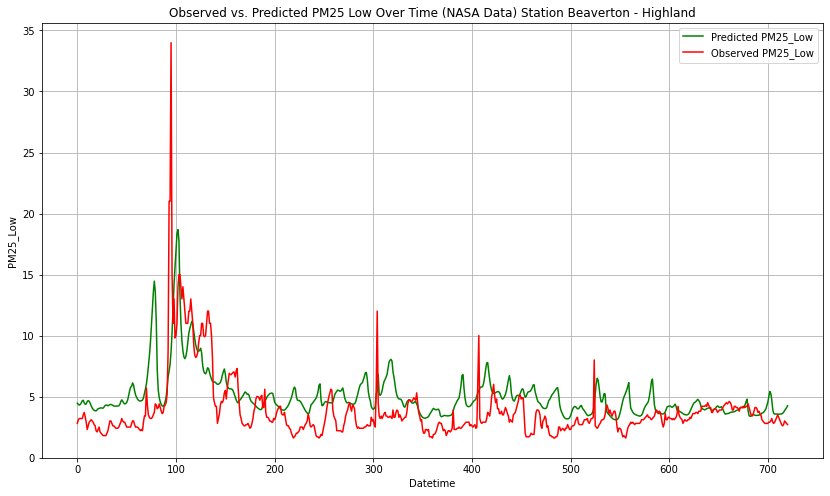

R2_Verification_Turner - CJHS:  0.35884552379929757


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


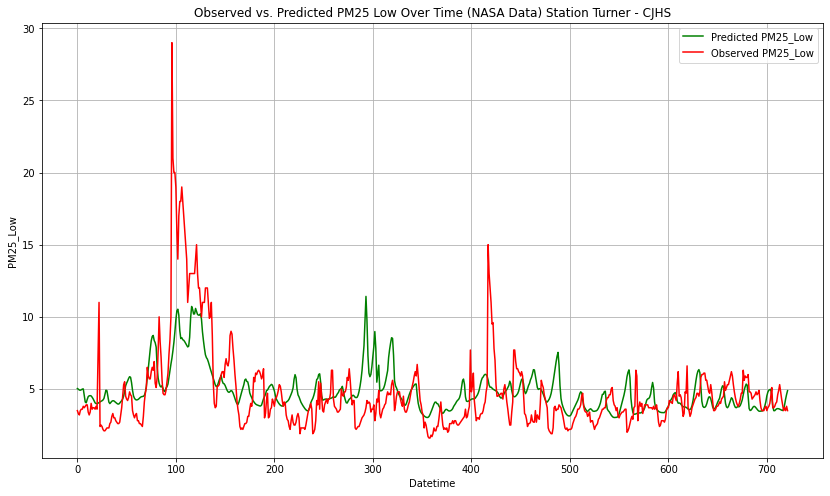

R2_Verification_Hillsboro - Hare Fie:  0.2797124318644806


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


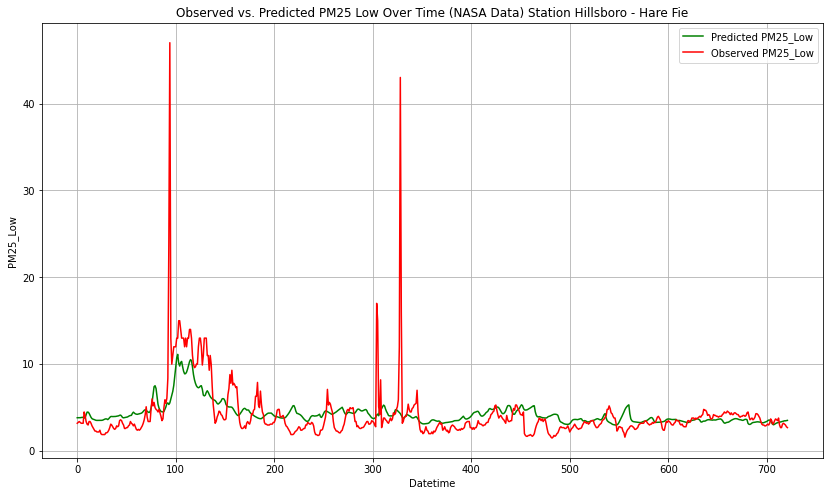

R2_Verification_Hermiston - Municipa:  -0.46150736111969737


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


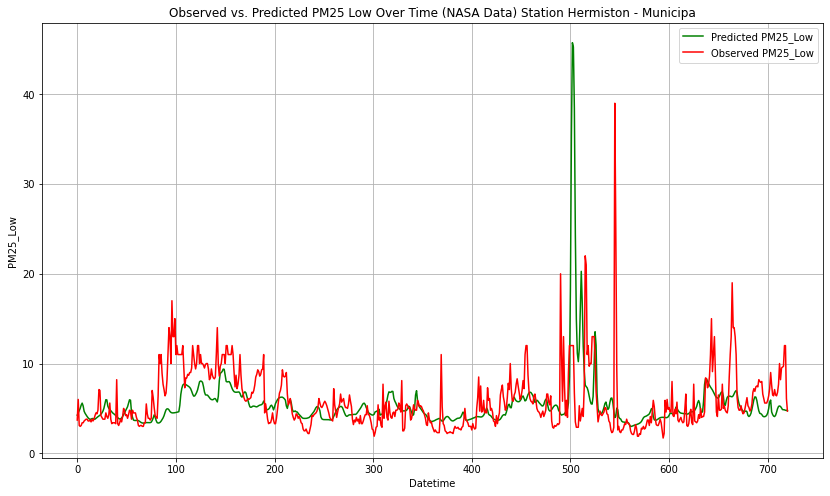

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_The Dalles - Cherry:  0.09563504839373649


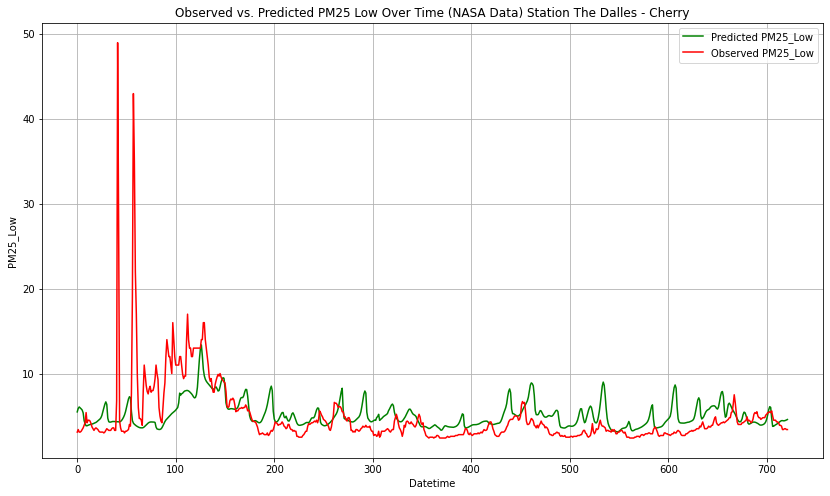

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Madras - Westside Sc:  -0.11589296325625398


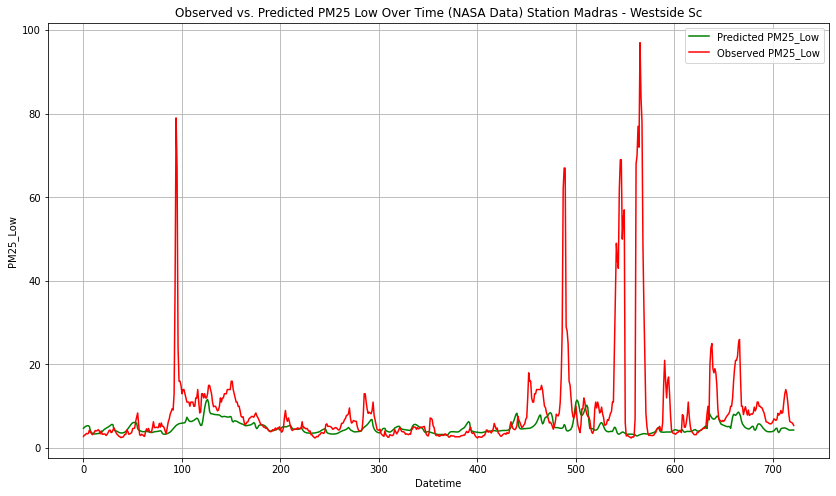

R2_Verification_Talent - Rapp Lane:  0.09908465194236604


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


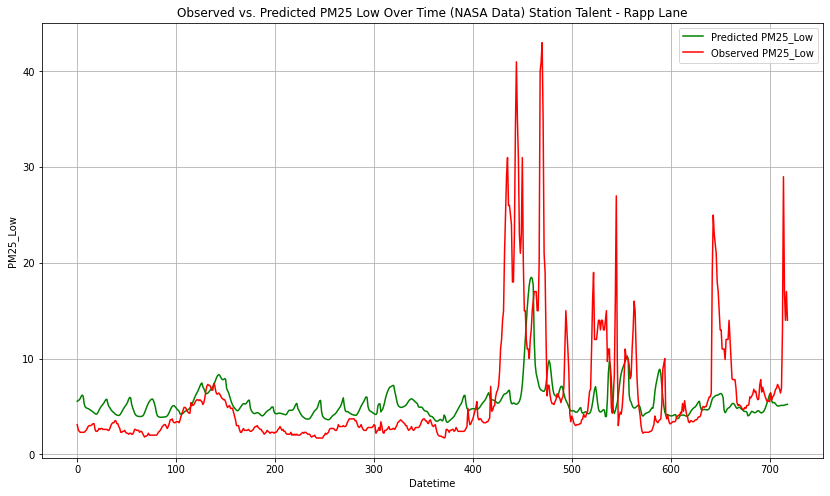

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Sweet Home - Fire De:  -0.0983398305679124


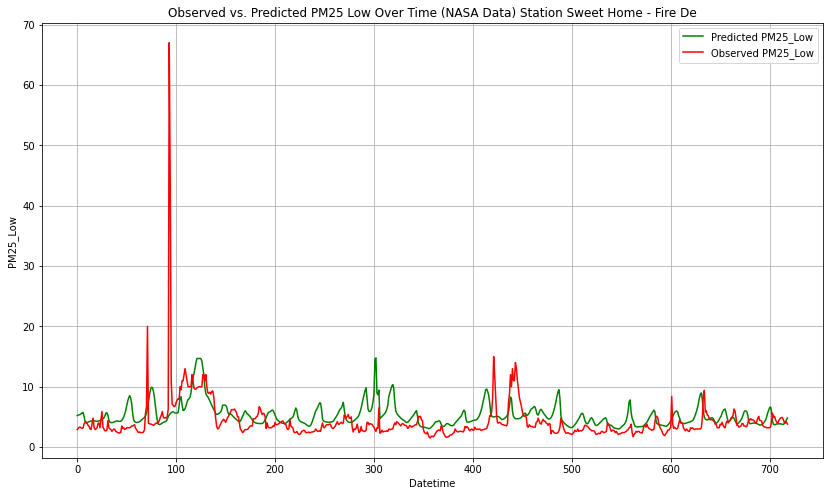

R2_Verification_Cave Junction Forest:  0.06097911311142967


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


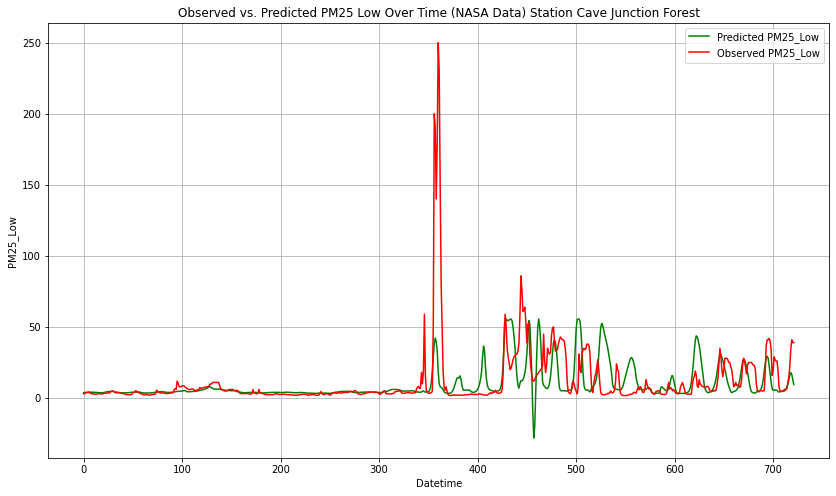

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Sisters Forest Servi:  0.07228045159597873


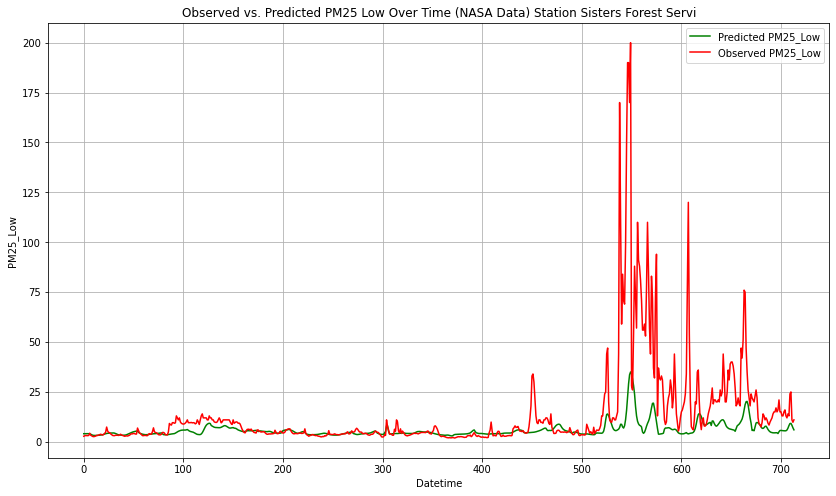

R2_Verification_Silverton:  0.20558456158534943


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


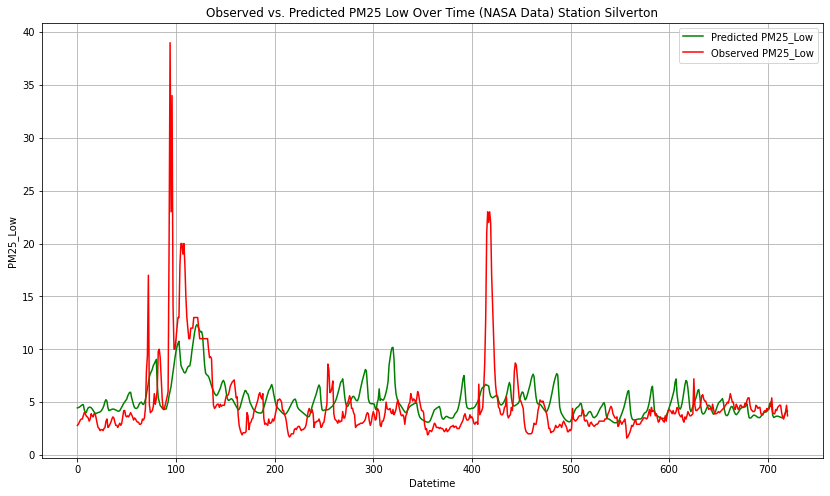

R2_Verification_Shady Cove - Shady C:  -0.684245483858565


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


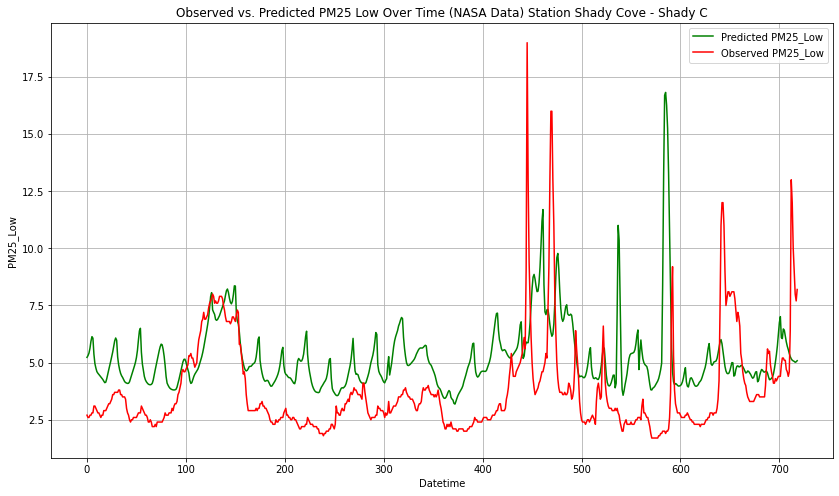

R2_Verification_Cottage Grove City S:  -0.7944259916793404


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


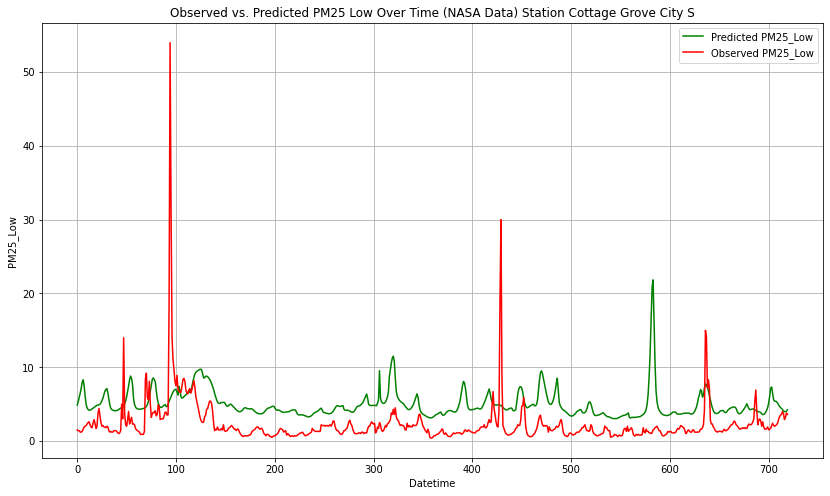

R2_Verification_Salem - State Hospit:  0.1971571757176589


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


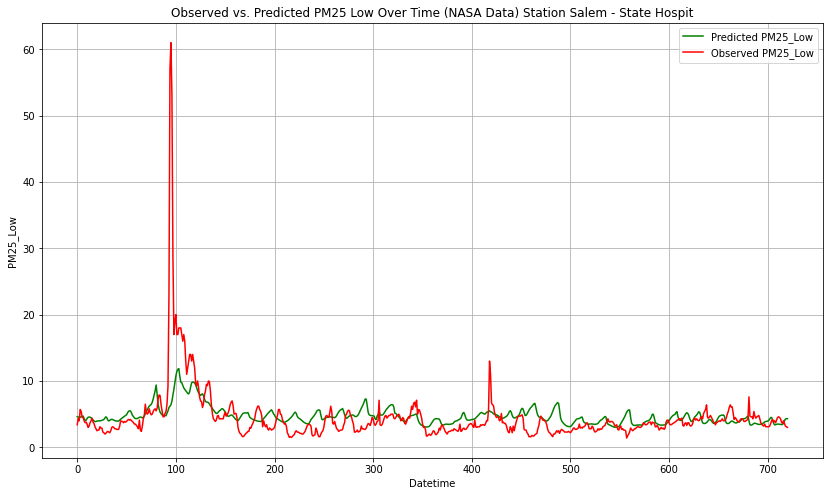

R2_Verification_Eugene - Highway 99:  -0.9757897477935251


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


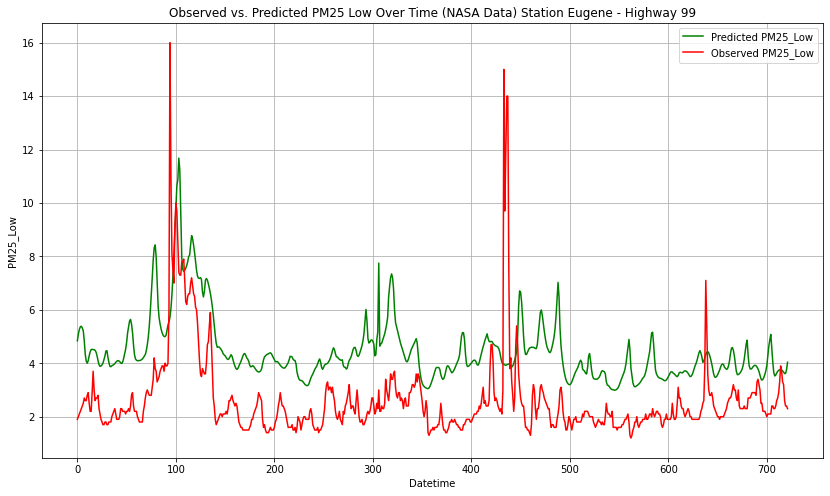

R2_Verification_Eugene - Amazon Park:  0.15618839717652155


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


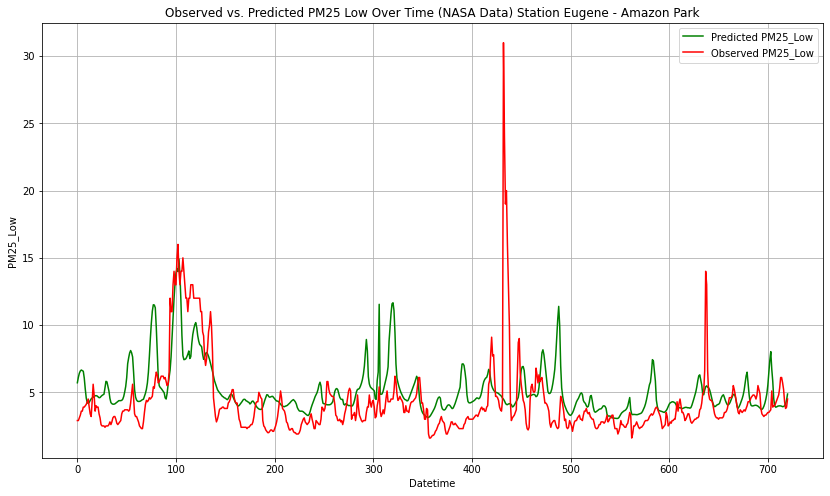

R2_Verification_Oakridge - Willamett:  -0.12478423646538261


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


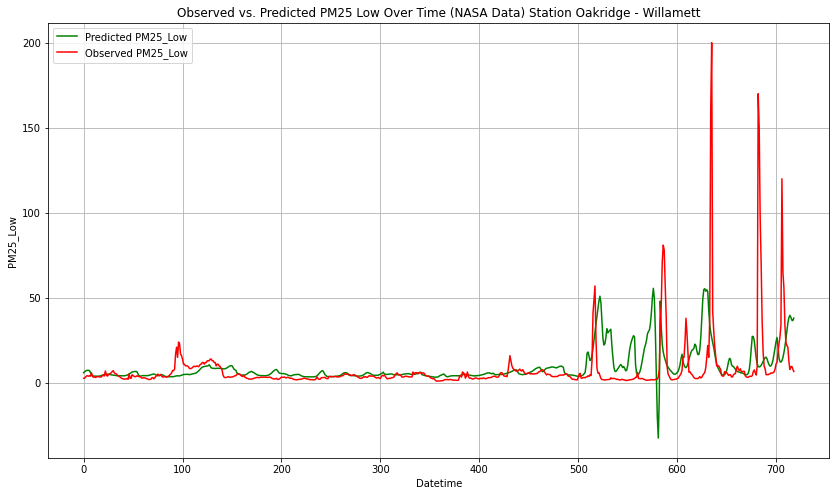

R2_Verification_Roosevelt High Schoo:  -0.06636495473505666


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


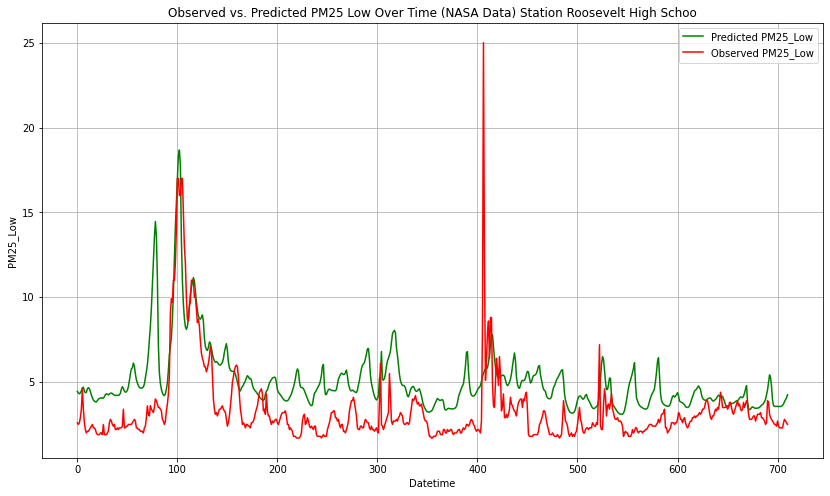

R2_Verification_Portland Lane Middle:  -0.8817411717605452


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


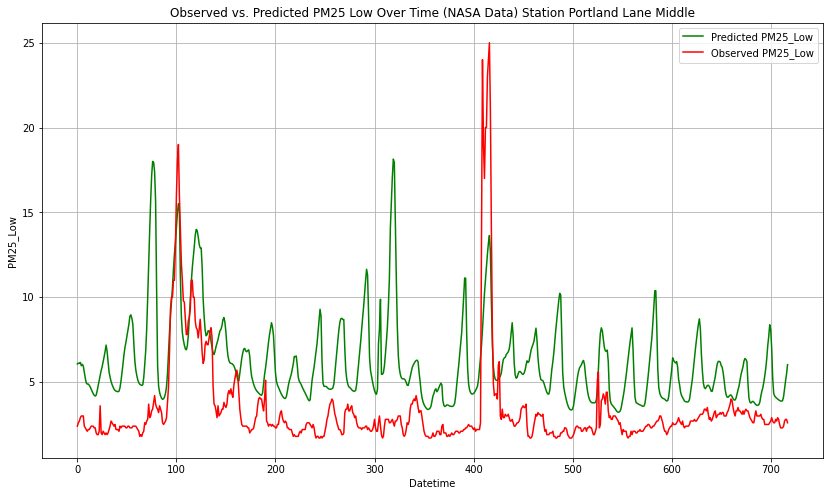

R2_Verification_Portland Lincoln Hig:  -0.2838920777802023


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


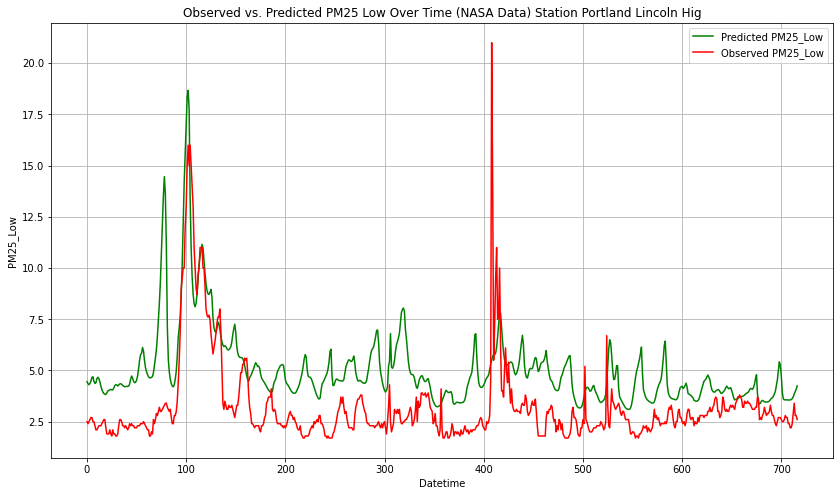

R2_Verification_Portland SE 12th and:  0.011805306737854848


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


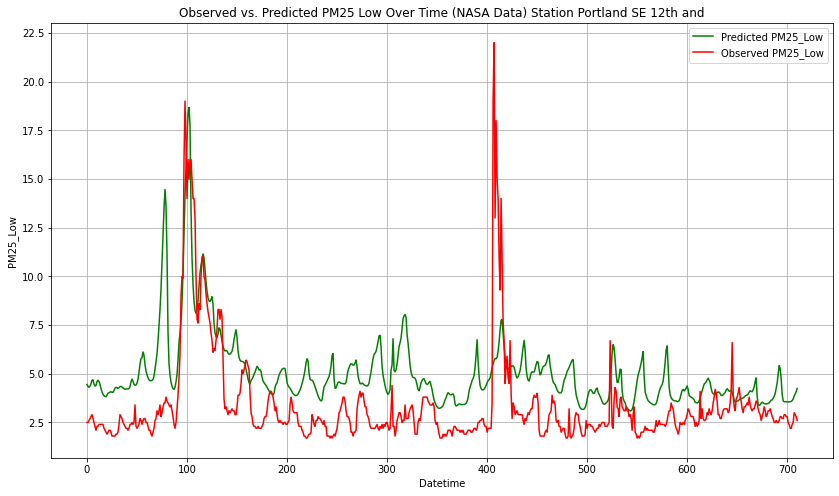

R2_Verification_Portland McDaniel Hi:  0.047882415520387744


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


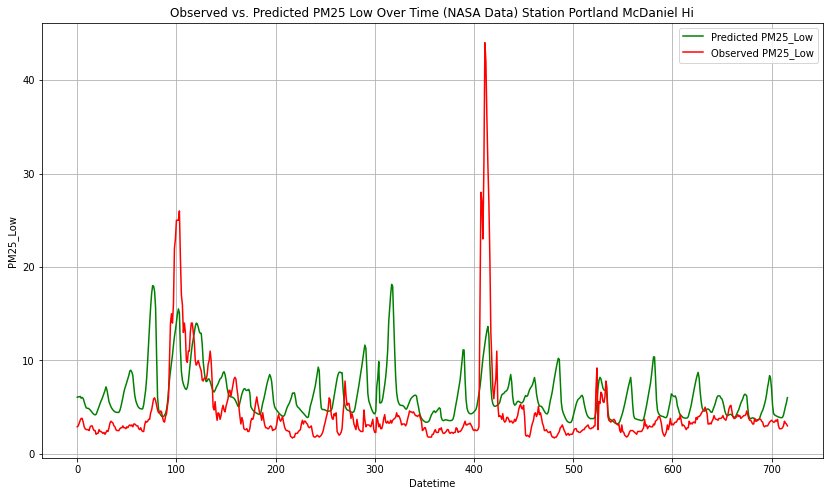

R2_Verification_Enterprise - US Fore:  0.14236420947665263


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


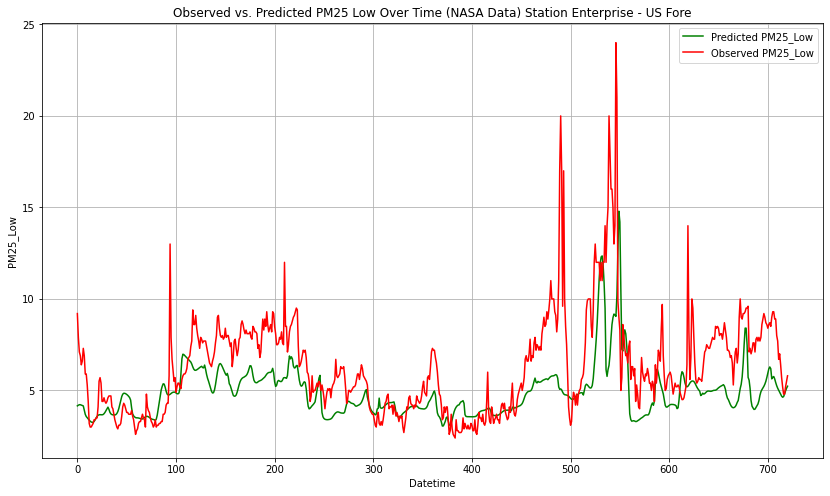

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Ashland Fire Dept:  0.012653895221109601


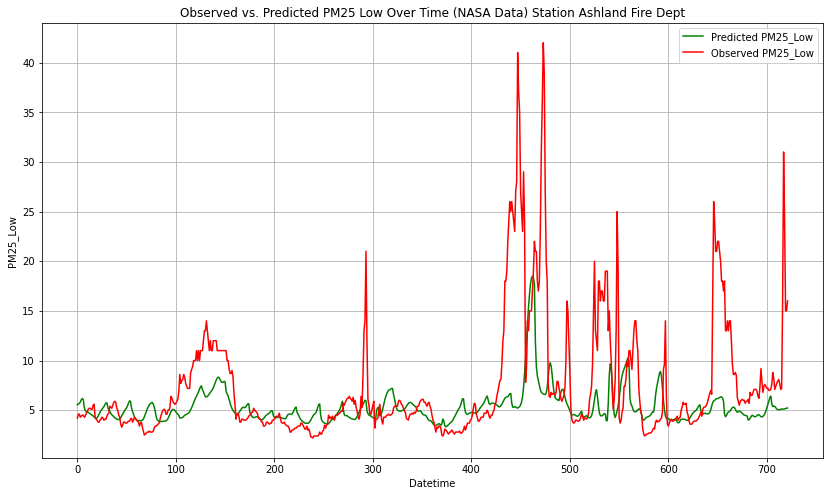

R2_Verification_Sunriver Three River:  0.3622196380312155


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


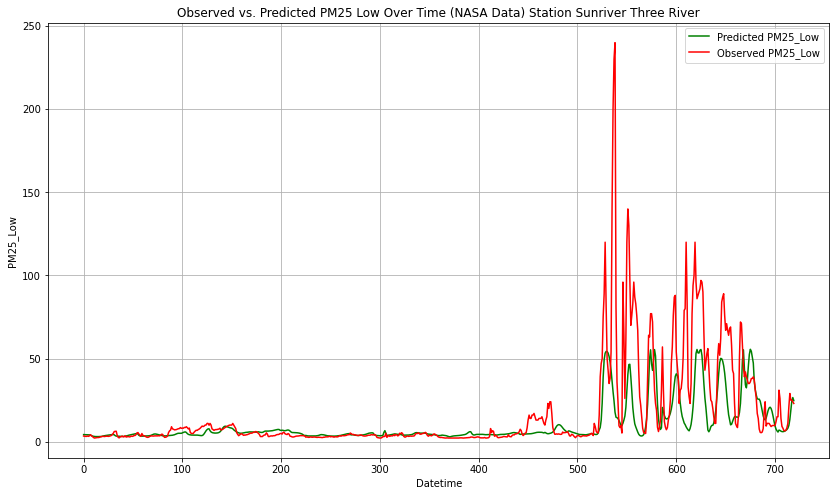

R2_Verification_Bend Pine Ridge Elem:  0.12465240579336212


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


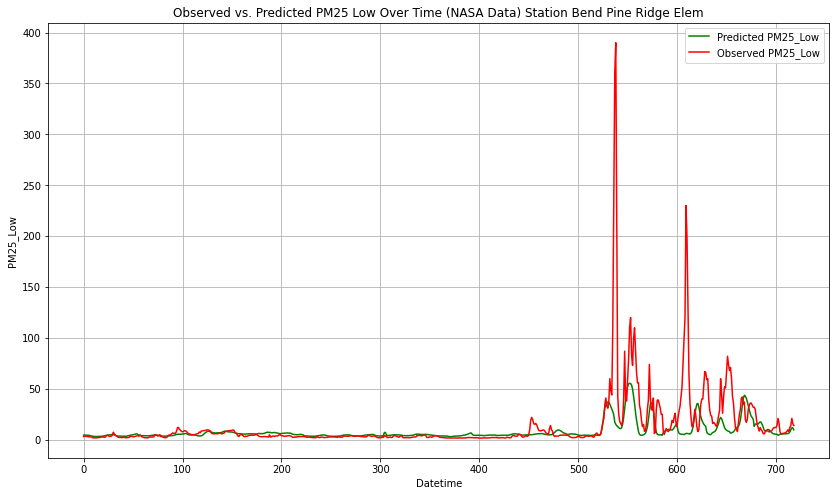

R2_Verification_Bend Ponderosa Eleme:  0.1738156441393649


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


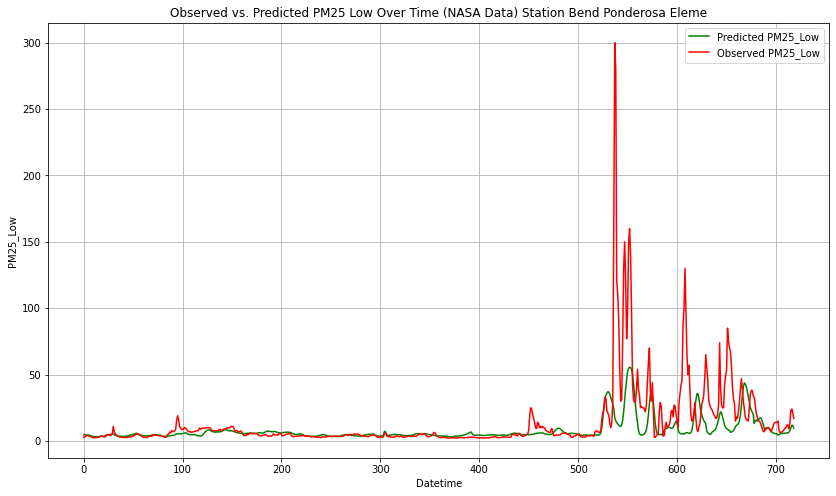

R2_Verification_Bend - Pump Station:  0.1526644090334529


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


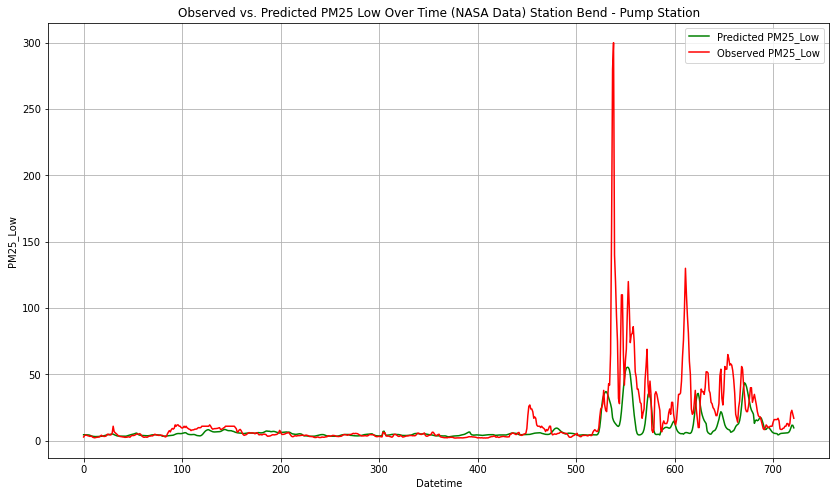

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Salem Chemeketa Comm:  0.22357737430645297


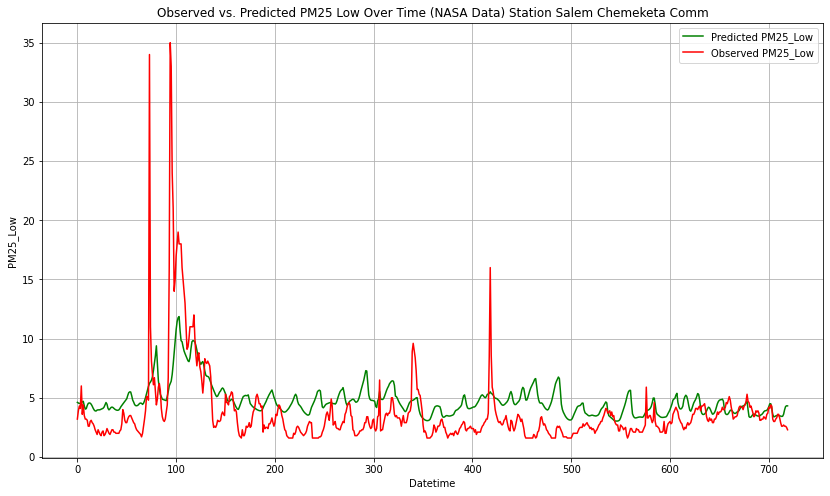

R2_Verification_Toledo NE Hwy20 & NW:  -1.2963620209895965


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


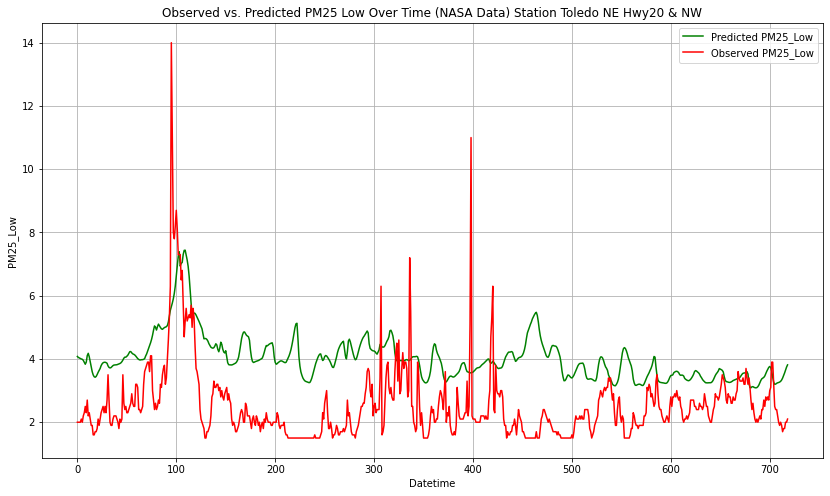

R2_Verification_Woodburn Chemeketa C:  0.0855071254927724


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


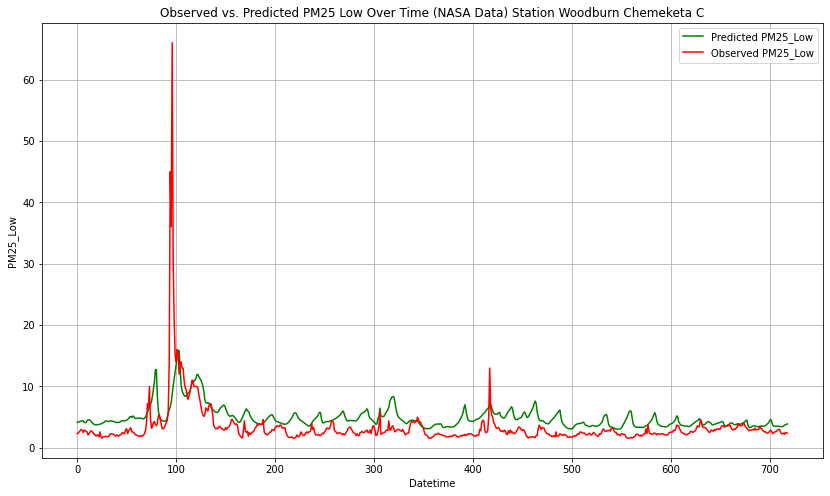

R2_Verification_Corvallis EPA Office:  0.0711528238866409


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


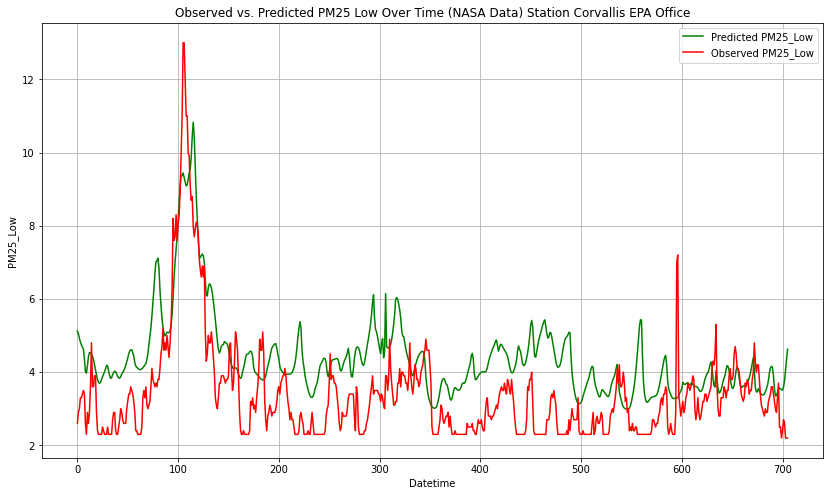

R2_Verification_Tillamook Jr High Sc:  -0.8260914264048582


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


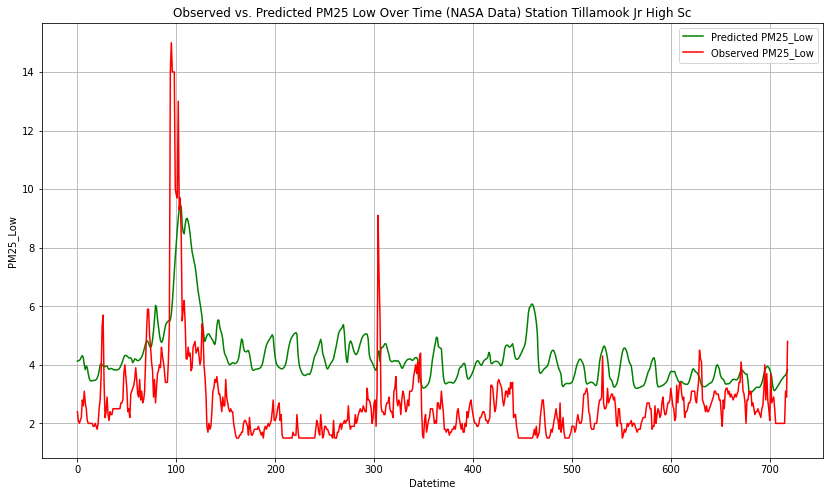

R2_Verification_McMinnville High Sch:  -0.11095695035880682


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


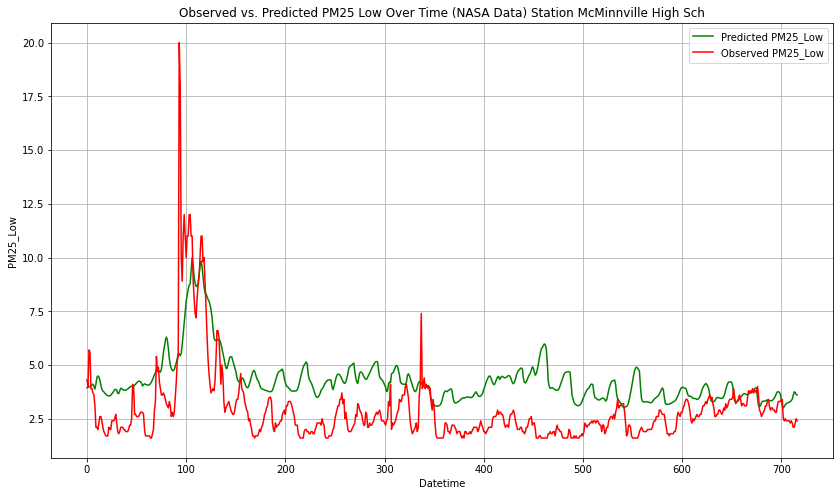

R2_Verification_Springfield City Hal:  -1.1469681526888205


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


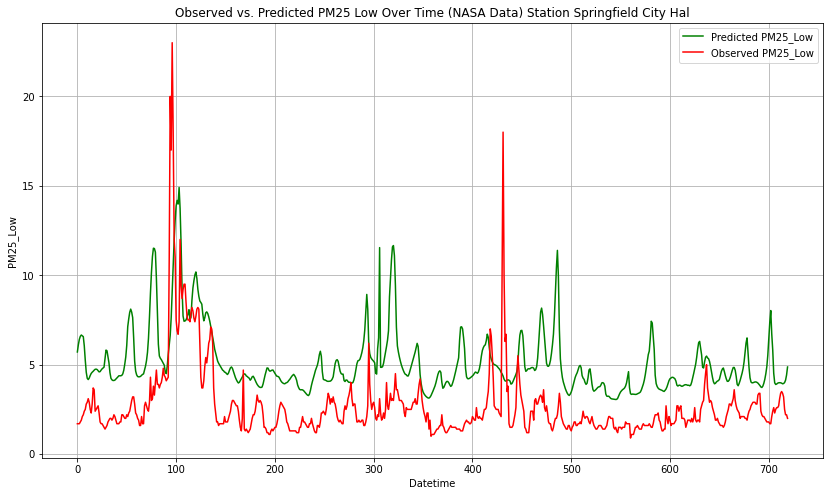

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Portland Humboldt Sc:  0.2439023470125572


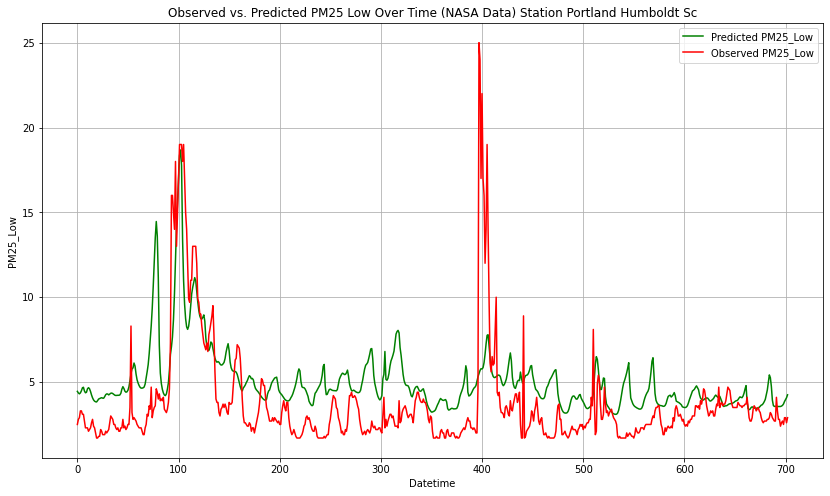

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Detroit Lake:  0.2942475576863781


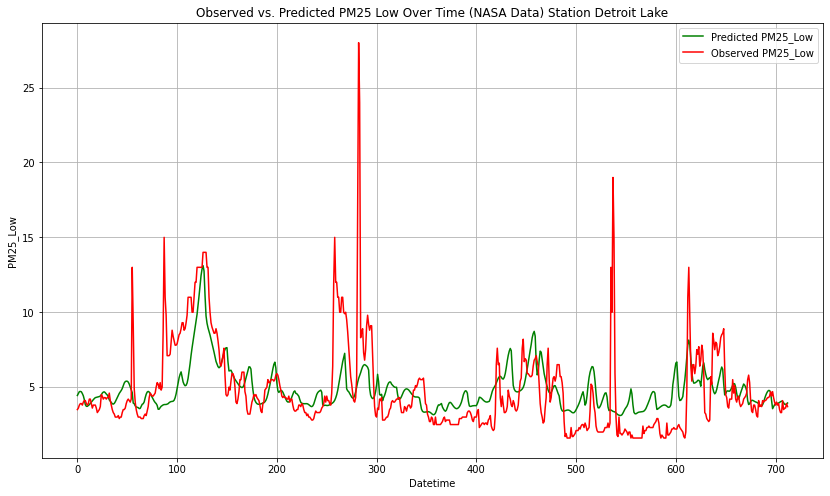

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Crater Lake Rim:  -2.034795525543392


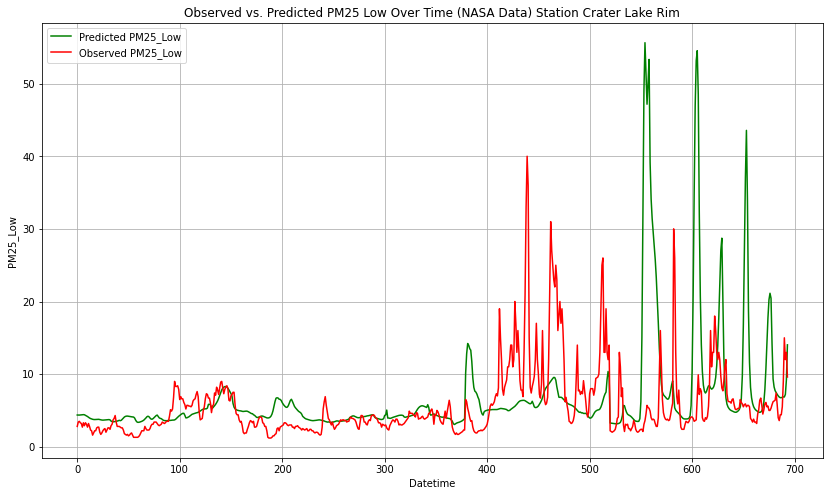

R2_Verification_Chiloquin:  0.4086752795528569


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


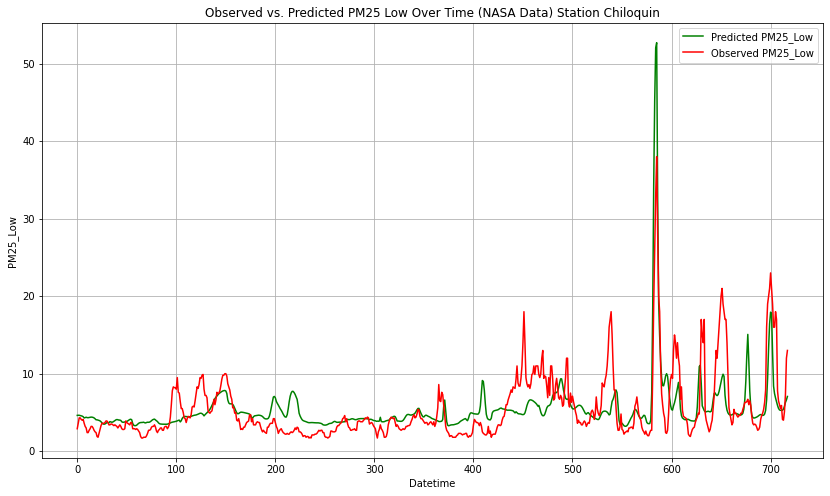

R2_Verification_Forest Grove Pacific:  0.15988247228609298


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


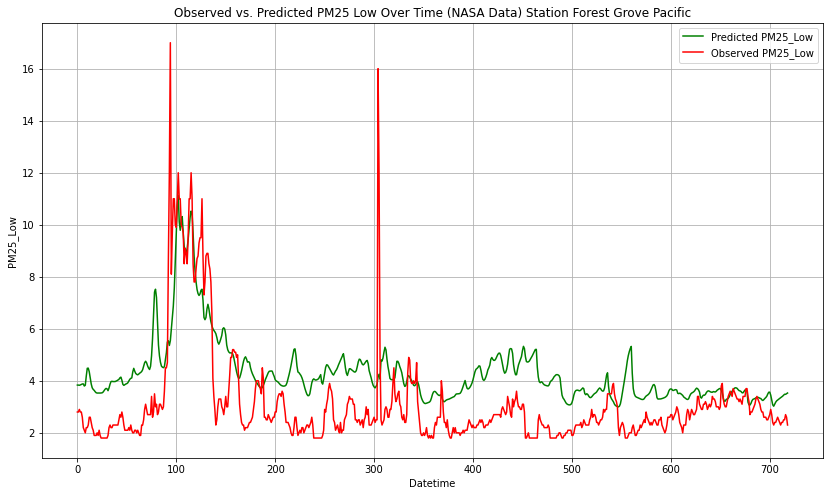

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Gresham Centennial H:  0.1276004606017349


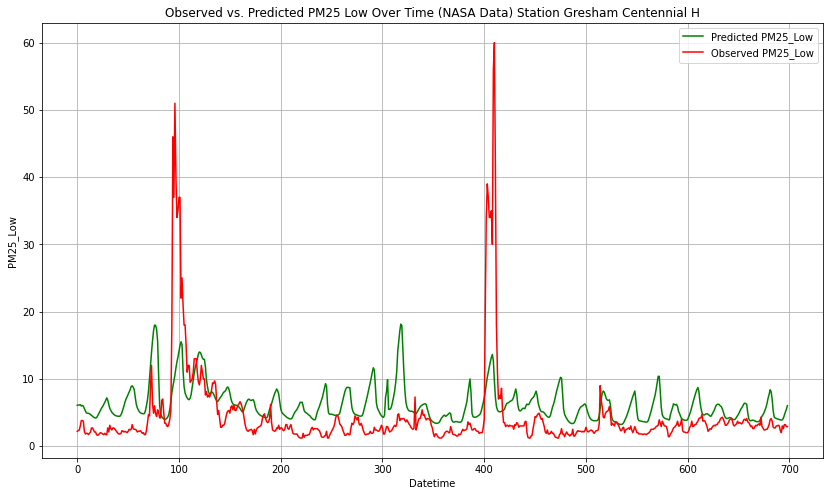

R2_Verification_Eugene - Wilkes Dr.:  0.23133498022947074


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


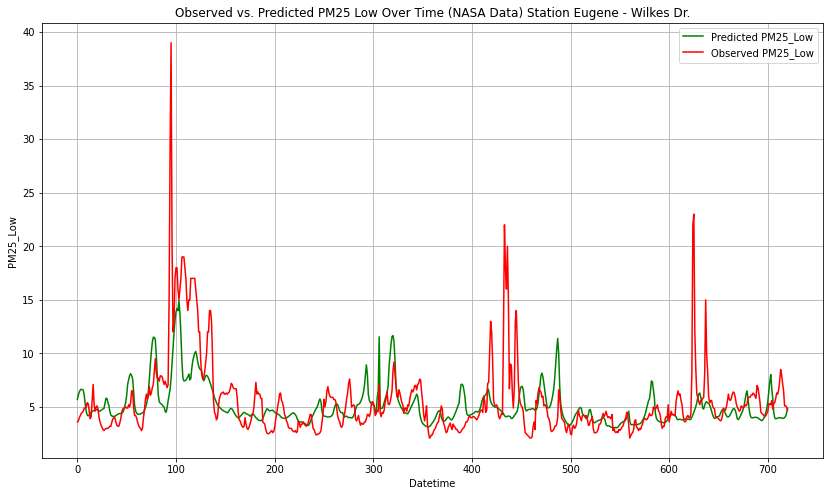

R2_Verification_Hood River West Side:  -0.45382066397953835


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


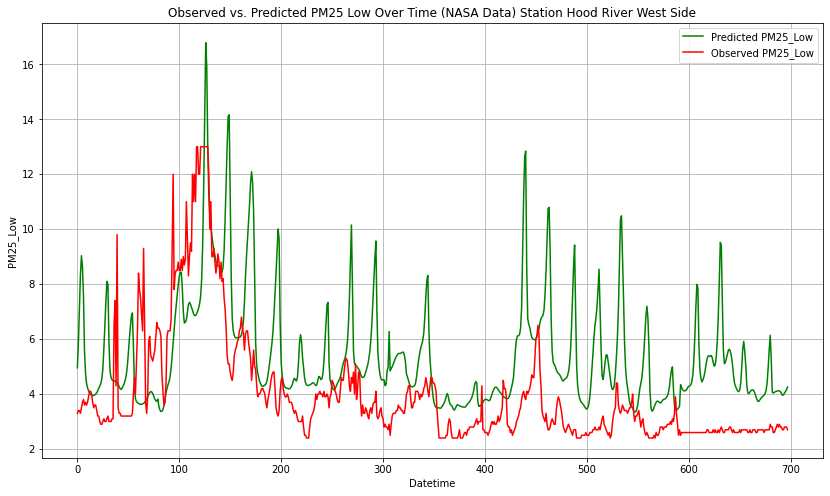

R2_Verification_La Grande Hall & N S:  0.23656061304858478


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


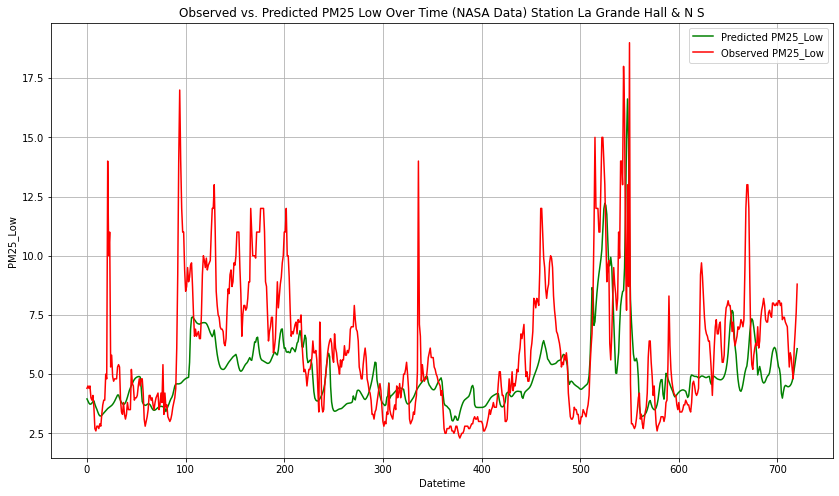

R2_Verification_La Pine Rural Fire D:  0.21996631283468826


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


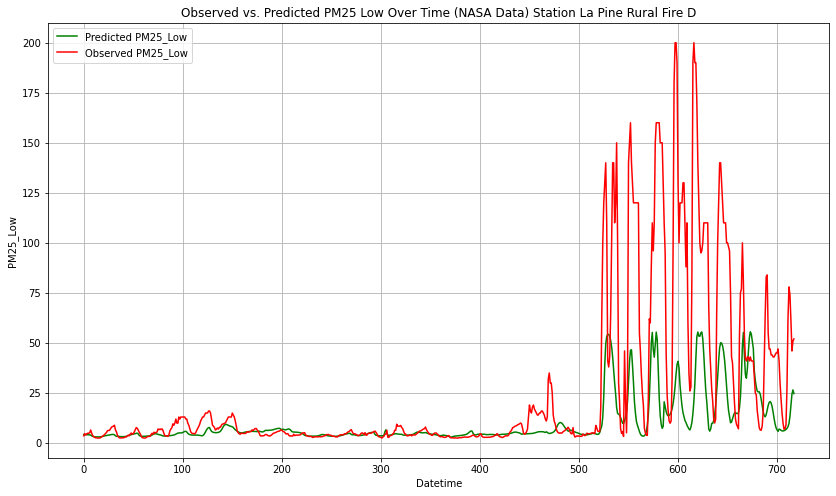

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Lyons:  0.14854322477705328


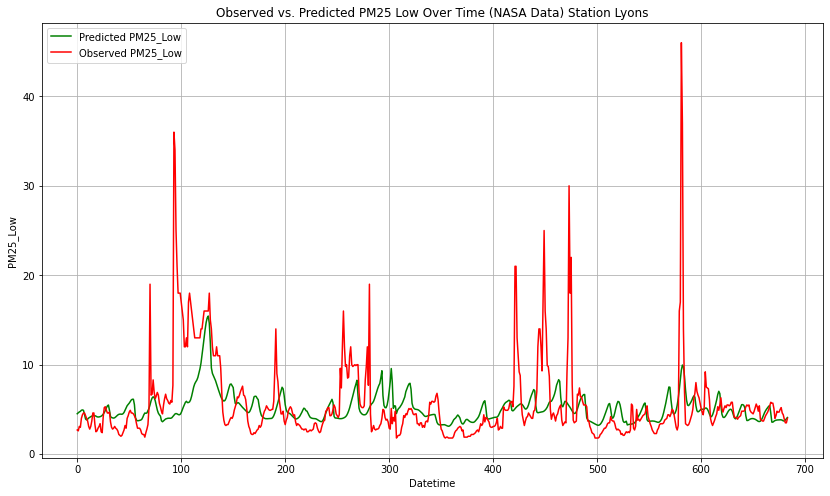

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Dallas LaCreole Midd:  -0.5071949779718434


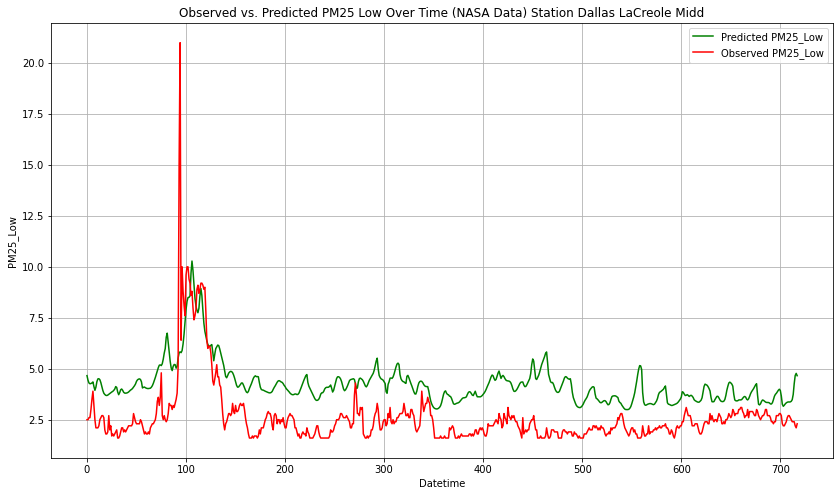

R2_Verification_Mill City:  0.19958402406660014


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


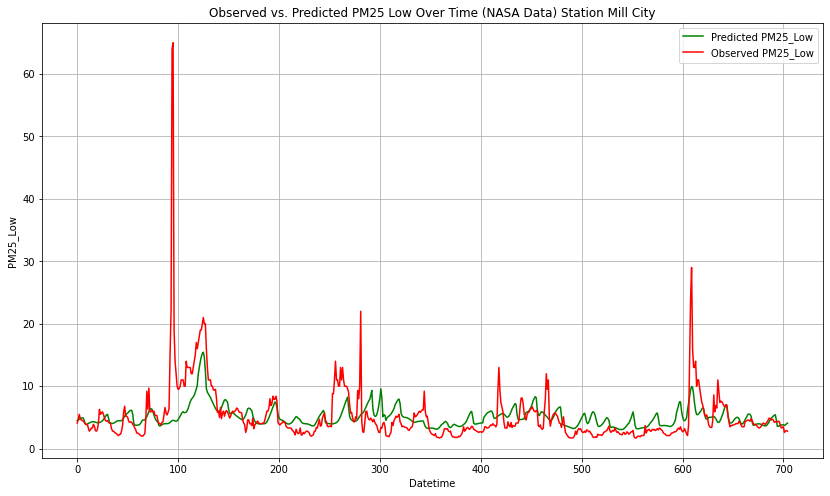

R2_Verification_Ontario May Roberts:  -0.5130388966278538


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


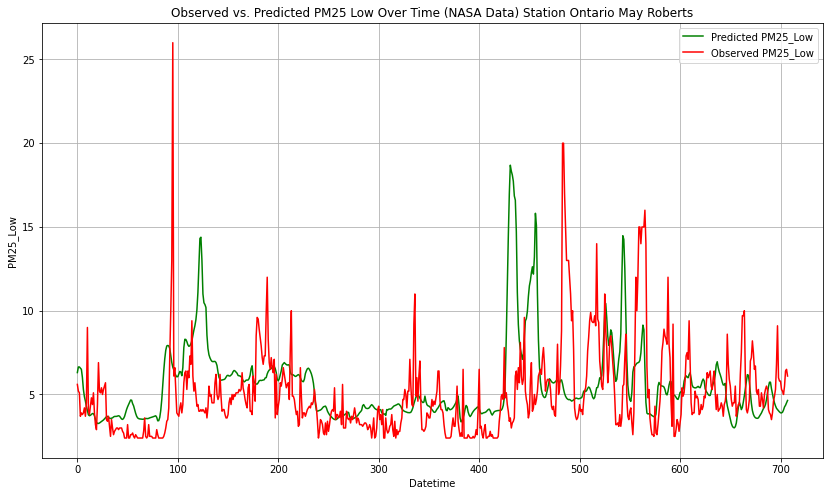

R2_Verification_Portland Cully Helen:  0.1447730465176693


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


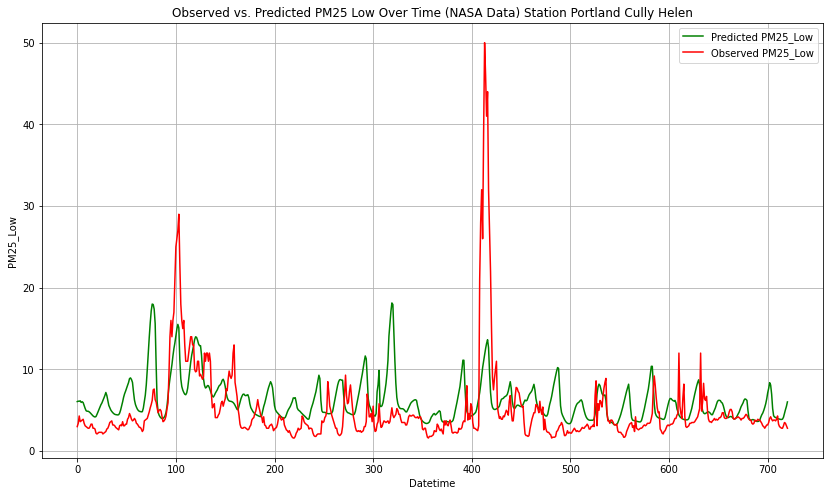

R2_Verification_Cove - City Hall:  0.3606030893362492


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


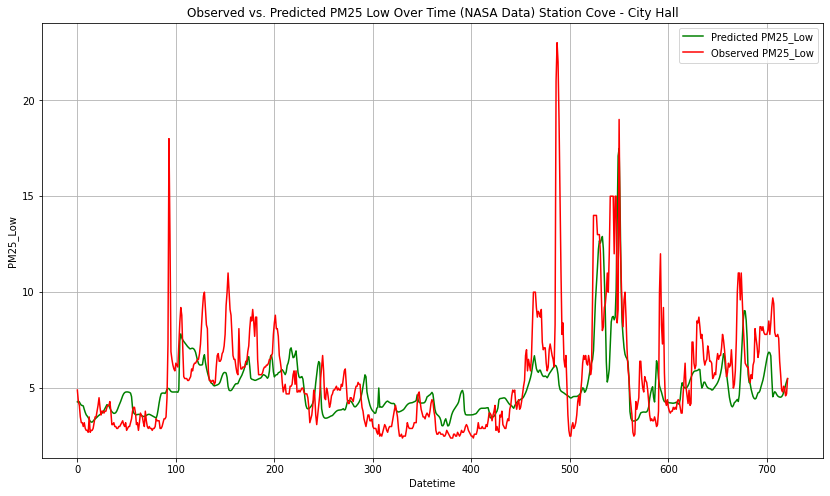

d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


R2_Verification_Coos Bay Marshfield:  -3.757459815437424


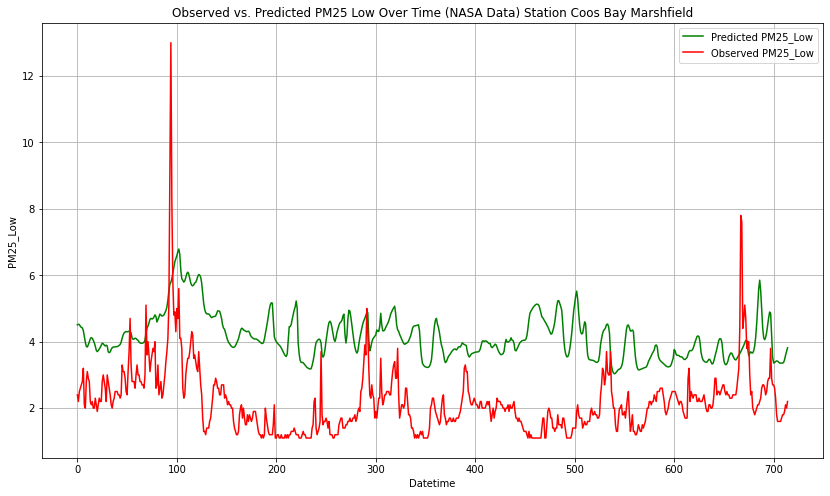

R2_Verification_Redmond High School:  0.04377107799360147


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


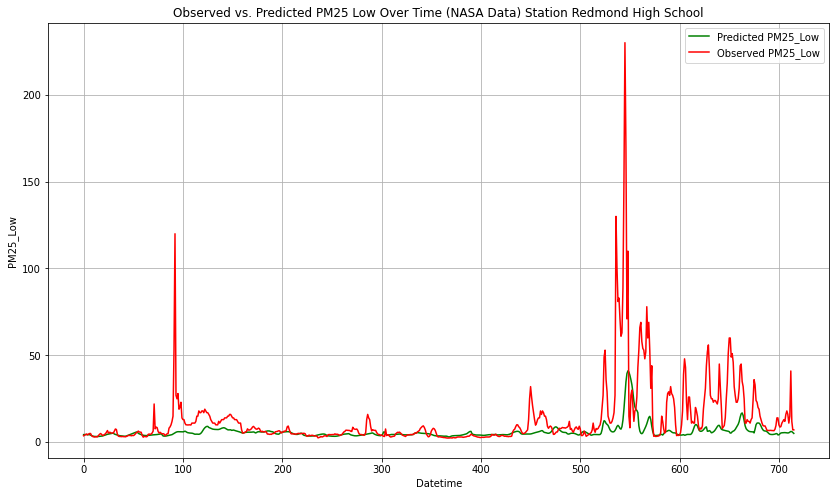

R2_Verification_Bend NE 8th & Emerso:  0.18291590851588224


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


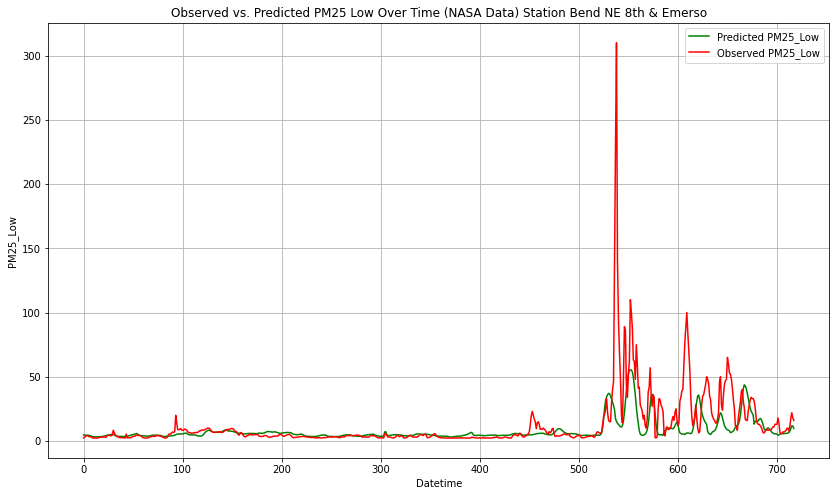

R2_Verification_Burns - Washington S:  0.06122644305789149


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


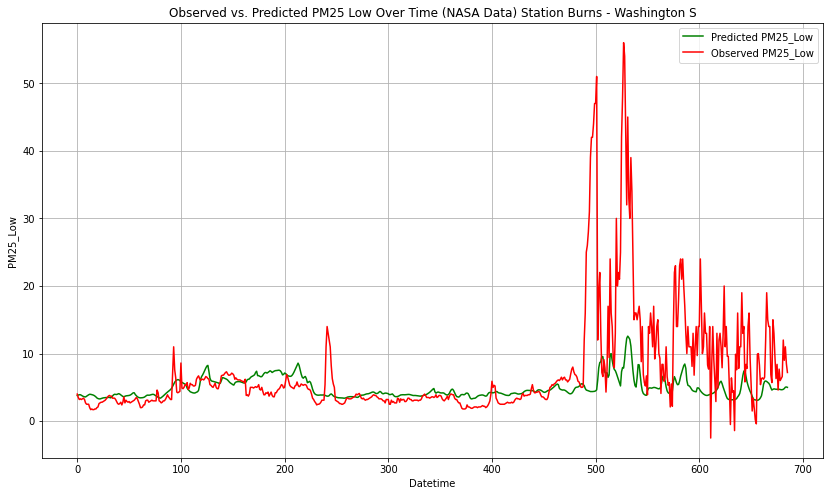

R2_Verification_Prineville - Davidso:  0.12720002696321053


d:\Code_Result\Software\Arcgis_Pro\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


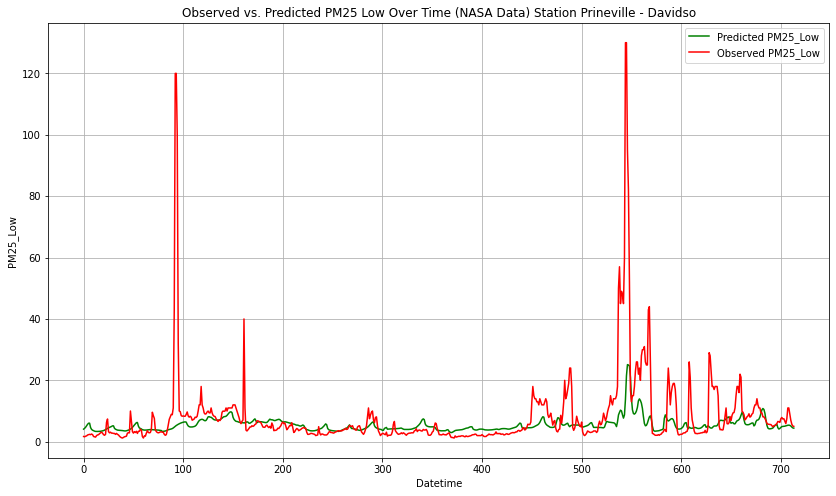

In [22]:
filename = r'D:\Code_Result\Result\NASA\Result_30minutes\Method_1\3_Model_30minutes_July_After_Corrected.sav'
model = pickle.load(open(filename, 'rb'))
for index_tram in range(len(stations)):
    # model.predict()
    X = data_1[stations[index_tram]][['PM25_RH35_GCC']]
    X.columns = ['PM25_High']
    X_poly = poly.transform(X)
    Y_pred = model.predict(X_poly)
    data_1[stations[index_tram]]['PM25_Low'] = Y_pred

for index_tram in range(len(stations)):
    Observed = np.array(data_in_general[stations[index_tram]]["PM25_Low"])
    Model = np.array(data_in_general[stations[index_tram]]["PM25_High"])
    X_poly = poly.transform(Model.reshape(-1, 1))
    Calibrated = model.predict(X_poly)
    R2_Verification_Station = r2_score(Observed, Calibrated)
    print(f"R2_Verification_{stations[index_tram]}: ", R2_Verification_Station)
    r2_verification_station = r2_score(Observed, Calibrated)
    mae_verification_station = mean_absolute_error(Observed, Calibrated)
    rmse_verification_station = mean_squared_error(Observed, Calibrated)
    df_error.loc[stations[index_tram]] = [r2_verification_station, mae_verification_station, rmse_verification_station]
    fig = plt.figure(figsize=(14, 8))
    plt.plot(Calibrated, label='Predicted PM25_Low', color='green')
    plt.plot(Observed, label='Observed PM25_Low', color='red')
    plt.xlabel('Datetime')
    plt.ylabel('PM25_Low')
    plt.title(f'Observed vs. Predicted PM25 Low Over Time (NASA Data) Station {stations[index_tram]}')
    plt.legend(); plt.grid(True); plt.show()
    fig.savefig(fr"D:\Code_Result\Result\NASA\Result_30minutes\Method_1\{stations[index_tram]}.jpg", format="jpg", dpi=1000)
    plt.close()

In [23]:
df_error.to_excel(r"D:\Code_Result\Result\NASA\Result_30minutes\Method_1\1_Error.xlsx")

In [24]:
import arcpy
from arcpy.sa import *

path_tiff_files = r'D:/Code_Result/Result/NASA/Tiff_Data_30minutes'
arcpy.env.overwriteOutput = True
arcpy.env.workspace = path_tiff_files
rasters = arcpy.ListRasters("*", "All")

# Set environment settings
arcpy.env.workspace = r"D:/Code_Result/Result/NASA/Result_30minutes"
arcpy.env.overwriteOutput = True

# Define input shapefile and raster paths
shapefile_path = r"F:/CMAQ_Model/HaNoi_Project/24.Shp/HaNoi_Khung/grid03.shp"
raster_path = "D:/Code_Result/Result/NASA/Tiff_Data_30minutes/"
output_raster_path = "D:/Code_Result/Result/NASA/Result_30minutes/Tiff_After_Extract/"
os.makedirs(output_raster_path, exist_ok=True)

# Get the extent of the shapefile
desc = arcpy.Describe(shapefile_path)
extent = desc.extent

# Extract the extent values
x_min = extent.XMin
y_min = extent.YMin
x_max = extent.XMax
y_max = extent.YMax

print(f"Shapefile Extent: {x_min}, {y_min}, {x_max}, {y_max}")

# Define the rectangle based on the shapefile extent

for raster in rasters:
    raster_input_file = raster_path + raster
    raster_output_file = output_raster_path + raster
    arcpy.Clip_management(in_raster=raster_input_file,
                        out_raster=raster_output_file,
                        in_template_dataset=shapefile_path)

    print(f"Raster clipped and saved to: {raster_output_file}")

OSError: "F:/CMAQ_Model/HaNoi_Project/24.Shp/HaNoi_Khung/grid03.shp" does not exist

In [ ]:
path_tiff_files = r'F:/Test/Tiff_After_Extract/'
arcpy.env.overwriteOutput = True
arcpy.env.workspace = path_tiff_files
rasters = arcpy.ListRasters("*", "All")
rasters

['2024_03_01_00_PM25_RH35_GCC.tif',
 '2024_03_01_00_Q.tif',
 '2024_03_01_00_RH.tif',
 '2024_03_01_00_SLP.tif',
 '2024_03_01_00_T.tif',
 '2024_03_01_00_U.tif',
 '2024_03_01_00_V.tif',
 '2024_03_01_01_PM25_RH35_GCC.tif',
 '2024_03_01_01_Q.tif',
 '2024_03_01_01_RH.tif',
 '2024_03_01_01_SLP.tif',
 '2024_03_01_01_T.tif',
 '2024_03_01_01_U.tif',
 '2024_03_01_01_V.tif',
 '2024_03_01_02_PM25_RH35_GCC.tif',
 '2024_03_01_02_Q.tif',
 '2024_03_01_02_RH.tif',
 '2024_03_01_02_SLP.tif',
 '2024_03_01_02_T.tif',
 '2024_03_01_02_U.tif',
 '2024_03_01_02_V.tif',
 '2024_03_01_03_PM25_RH35_GCC.tif',
 '2024_03_01_03_Q.tif',
 '2024_03_01_03_RH.tif',
 '2024_03_01_03_SLP.tif',
 '2024_03_01_03_T.tif',
 '2024_03_01_03_U.tif',
 '2024_03_01_03_V.tif',
 '2024_03_01_04_PM25_RH35_GCC.tif',
 '2024_03_01_04_Q.tif',
 '2024_03_01_04_RH.tif',
 '2024_03_01_04_SLP.tif',
 '2024_03_01_04_T.tif',
 '2024_03_01_04_U.tif',
 '2024_03_01_04_V.tif',
 '2024_03_01_05_PM25_RH35_GCC.tif',
 '2024_03_01_05_Q.tif',
 '2024_03_01_05_RH.tif',


In [ ]:
dem = 0
data_PM25_RH35_GCC = []; data_Q = []; data_RH = []
data_SLP = []; data_T = []; data_U = []; data_V = []
for raster in rasters:
    dem = dem + 1
    raster_tiff = rasterio.open(os.path.join(path_tiff_files, raster))
    variable = raster[14:-4]; Substance = raster_tiff.read(1)
    print(raster, variable)
    for i in range(Substance.shape[0]):
        for j in range(Substance.shape[1]):
            globals()[f"data_{variable}"].append(Substance[i][j])
    if (dem == 7): ### There are 7 substances
        df = pd.DataFrame({
            "PM25_High": data_PM25_RH35_GCC, 
            "Q": data_Q, "RH": data_RH, 
            "SLP": data_SLP, "T": data_T, 
            "U": data_U, "V": data_V
        })
        X = df[['PM25_High', 'Q', 'RH', 'SLP', 'T', 'U', 'V']]
        X_poly = poly.transform(X)
        Y_pred = model.predict(X_poly)
        df['PM25_Low'] = Y_pred
        dem = 0
        for i in range(Substance.shape[0]):
            for j in range(Substance.shape[1]):
                Substance[i][j] = df["PM25_Low"][dem]
                dem = dem + 1

        metadata = raster_tiff.meta
        transform = metadata['transform']
        metadata.update({
            'dtype': Substance.dtype,
            'count': 1,
            'height': Substance.shape[0],
            'width': Substance.shape[1],
            'transform': transform
        })
        output_tiff = f"F:/Test/Tiff_After_Calibrate/{raster[:13]}.tiff"
        with rasterio.open(output_tiff, 'w', **metadata) as dst:
            dst.write(Substance, 1)
        dem = 0
        data_PM25_RH35_GCC = []; data_Q = []; data_RH = []
        data_SLP = []; data_T = []; data_U = []; data_V = []

2024_03_01_00_PM25_RH35_GCC.tif PM25_RH35_GCC
2024_03_01_00_Q.tif Q
2024_03_01_00_RH.tif RH
2024_03_01_00_SLP.tif SLP
2024_03_01_00_T.tif T
2024_03_01_00_U.tif U
2024_03_01_00_V.tif V
2024_03_01_01_PM25_RH35_GCC.tif PM25_RH35_GCC
2024_03_01_01_Q.tif Q
2024_03_01_01_RH.tif RH
2024_03_01_01_SLP.tif SLP
2024_03_01_01_T.tif T
2024_03_01_01_U.tif U
2024_03_01_01_V.tif V
2024_03_01_02_PM25_RH35_GCC.tif PM25_RH35_GCC
2024_03_01_02_Q.tif Q
2024_03_01_02_RH.tif RH
2024_03_01_02_SLP.tif SLP
2024_03_01_02_T.tif T
2024_03_01_02_U.tif U
2024_03_01_02_V.tif V
2024_03_01_03_PM25_RH35_GCC.tif PM25_RH35_GCC
2024_03_01_03_Q.tif Q
2024_03_01_03_RH.tif RH
2024_03_01_03_SLP.tif SLP
2024_03_01_03_T.tif T
2024_03_01_03_U.tif U
2024_03_01_03_V.tif V
2024_03_01_04_PM25_RH35_GCC.tif PM25_RH35_GCC
2024_03_01_04_Q.tif Q
2024_03_01_04_RH.tif RH
2024_03_01_04_SLP.tif SLP
2024_03_01_04_T.tif T
2024_03_01_04_U.tif U
2024_03_01_04_V.tif V
2024_03_01_05_PM25_RH35_GCC.tif PM25_RH35_GCC
2024_03_01_05_Q.tif Q
2024_03_01_0